# Pergunta: 2. Quais indicadores devem ser priorizados para melhorar o PIB da amazonia legal?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregando Bibliotecas

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

## Carregando Dados

In [ ]:
# Lendo dados do censo
df_censo = pd.read_excel('/content/drive/MyDrive/BCG Gamma Challenge/dados/CENSO/Censo_municipal_estadual_nacional.xlsx', sheet_name = 'MUN 91-00-10')
# Lendo dados do registro adm
df_reg_adm = pd.read_excel('/content/drive/MyDrive/BCG Gamma Challenge/dados/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx', sheet_name = 'MUNICÍPIO')
# PIB com Impostos do registro adm (fonte externa)
df_pib = pd.read_excel('/content/drive/MyDrive/BCG Gamma Challenge/dados/Registros Administrativos/PIB dos Municípios - base de dados 2010-2018.xlsx')

In [ ]:
# Seleciona as colunas necessarias
df_pib = df_pib[['Ano','Código da Unidade da Federação', 
                'Código do Município',
                'Nome do Município',
                'Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)',
                'Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)',
                'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)',
                'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)',
                'Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)',
                'Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)',
                'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']]

In [ ]:
# Muda os nomes das colunas do pib
df_pib.columns = ['Ano','Código da Unidade da Federação', 'IBGE7', 'Nome do Município', 'VA_agro','VA_ind','VA_serv','VA_adm','VA_total', 'Impostos','PIB']

In [ ]:
# Lendo dados de legenda
df_censo_leg = pd.read_excel('/content/drive/MyDrive/BCG Gamma Challenge/dados/CENSO/Censo_municipal_estadual_nacional.xlsx', sheet_name = 'Siglas')
df_reg_adm_leg = pd.read_excel('/content/drive/MyDrive/BCG Gamma Challenge/dados/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx', sheet_name = 'LEGENDA')


In [ ]:
# Renomeia a coluna 
df_reg_adm_leg = df_reg_adm_leg.rename(columns = {'NOME DO INDICADOR': 'NOME CURTO'})

In [ ]:
df_legendas = pd.concat([df_censo_leg, df_reg_adm_leg], axis = 0)

In [ ]:
df_legendas[['SIGLA','NOME CURTO', 'DEFINIÇÃO']]

,SIGLA,NOME CURTO,DEFINIÇÃO
0,UF,Código da Unidade da Federação,Código utilizado pelo IBGE para identificação do estado.
1,UFN,Nome da Unidade da Federação,Nome da Unidade da Federação.
2,CODMUN6,Código do Município,Código utilizado pelo IBGE para identificação do município.
3,CODMUN7,Código do Município,Código utilizado pelo IBGE para identificação do município(com digito verificador).
4,NOMEMUN,Nome do Município,Nome do município.
5,ESPVIDA,Esperança de vida ao nascer,"Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo."
6,FECTOT,Taxa de fecundidade total,Número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo (15 a 49 anos de idade).
7,MORT1,Mortalidade infantil,Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas.
8,MORT5,Mortalidade até 5 anos de idade,"Probabilidade de morrer entre o nascimento e a idade exata de 5 anos, por 1000 crianças nascidas vivas."
9,RAZDEP,Razão de dependência,Razão de dependência é medida pela razão entre o número de pessoas com 14 anos ou menos e de 65 anos ou mais de idade (população dependente) e o número de pessoas com idade de 15 a 64 anos (população potencialmente ativa) multiplicado por 100.


In [ ]:
# Filtrando apenas dados do CENSO de 2010
df_censo = df_censo.rename(columns = {'Codmun7': 'IBGE7'})
df_censo_2010 = df_censo.query('ANO == 2010').drop('ANO', axis = 1)

## Unindo Tabelas (CENSO + Registros Administrativos + PIB (externa)

In [ ]:
# Cria uma copia da tabela principal
df = df_reg_adm.copy()

In [ ]:
# Join da tabela do censo com a tabela de reg. adm
df = df.merge(df_censo_2010, on = 'IBGE7', how = 'left')



In [ ]:
# Jin da tabela de pib com os demais dados
df = df.merge(df_pib, left_on = ['IBGE7','ANO'], right_on = ['IBGE7','Ano'], how='left')

In [ ]:
df['UF'] = df['UF'].fillna('42')

In [ ]:
## Filtragem de dados da Amazonia Legal

uf_dict = {
'11' :'Rondônia',
'12' :'Acre',
'13' :'Amazonas',
'14' :'Roraima',
'15' :'Pará',
'16' :'Amapá',
'17' :'Tocantins',
'21' :'Maranhão',
'22' :'Piauí',
'23' :'Ceará',
'24' :'Rio Grande do Norte',
'25' :'Paraíba',
'26' :'Pernambuco',
'27' :'Alagoas',
'28' :'Sergipe',
'29' :'Bahia',
'31' :'Minas Gerais',
'32' :'Espírito Santo',
'33' :'Rio de Janeiro',
'35' :'São Paulo',
'41' :'Paraná',
'42' :'Santa Catarina',
'43' :'Rio Grande do Su',
'50' :'Mato Grosso do Sul',
'51' :'Mato Grosso',
'52' :'Goiás',
'53' :'Distrito Federal'
}
df['UF'] = df['UF'].astype(int)
df['UF'] = df['UF'].astype(str)

df['Estado'] = df['UF'].map(uf_dict)

# Estados da Amazônia Legal
estados_amazonia_legal = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Mato Grosso', 'Maranhão']

# Filtra estados da amazonia legal
df['Amazonia_legal'] = df['Estado'].apply(lambda x: 1 if x in estados_amazonia_legal else 0)


In [ ]:
# Salva um dataframe com o nome dos municpios, estados e respectivos codigos do IBGE
df_municipios = df[['IBGE7', 'Estado','Município']]

## Limpando as variaveis 

In [ ]:
df.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,...,Nome do Município,VA_agro,VA_ind,VA_serv,VA_adm,VA_total,Impostos,PIB,Estado,Amazonia_legal
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,...,Alta Floresta D'Oeste,110850.843,20336.994,73025.072,120335.591,324548.501,16776.193,341324.694,Rondônia,1
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,...,Ariquemes,93249.747,354733.212,694832.170,466732.805,1609547.934,190304.571,1799852.506,Rondônia,1
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,...,Cabixi,38259.429,3412.205,17787.446,32838.639,92297.720,4066.819,96364.539,Rondônia,1
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,...,Cacoal,140658.879,140288.317,599519.834,395842.235,1276309.265,156944.241,1433253.506,Rondônia,1
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,...,Cerejeiras,45153.637,19889.818,149569.439,83089.551,297702.446,55567.232,353269.678,Rondônia,1


Vamos assumir que se as variaveis possuem mais que 1/3 de valores nulos, caso contrario elas deverao ser desconsideradas. Alem disso, as demais variaveis podem ser substituidas por media ou mediana de cada regiao, tornando assim mais coerente a substituicao.

In [ ]:
valores_ausentes = (df.isna().sum() / df.shape[0]).reset_index().rename(columns = {'index': 'variaveis', 0: 'perc_ausente'})

In [ ]:
valores_ausentes.sample(10)

,variaveis,perc_ausente
302,pesoRUR,0.000898
124,T_FREQ25A29,0.000898
44,TXOBITMATERN,0.528187
112,T_FBMED,0.000898
262,MULH35A39,0.000898
26,DOCSUP_EF_TOTAL,0.000000
48,PINTERSAP,0.000072
225,T_CRIFUNDIN_TODOS,0.000898
149,T_SUPER25M,0.000898
132,T_FREQFUND1824,0.000898


In [ ]:
# Excluindo dados que contem muitos valores ausentes
for col in valores_ausentes['variaveis']:
    if valores_ausentes.loc[valores_ausentes['variaveis'] == col, 'perc_ausente'].values[0] > 0.3:
        df = df.drop(col, axis = 1)

In [ ]:
for col in df.select_dtypes(include = ['float64', 'int64']):
  df[col] = df[col].fillna(df.groupby('Estado')[col].transform('mean'))

In [ ]:
# Check se ainda ha dados faltantes
df.isna().sum()

ANO                                0
DESAGREGACAO                       0
IBGE7                              0
NOME                               0
PMATPUB_EF                         0
PMATPUB_EM                         0
DIST_EF_TOTAL                      0
DIST_EM_TOTAL                      0
PMATLINF_EF                        0
PMATLINF_EM                        0
PMATINT_EF                         0
PMATINT_EM                         0
DOCSUP_EF_TOTAL                    0
DOCSUP_EM_TOTAL                    0
DOCSUP_EF_PUB                      0
DOCSUP_EM_PUB                      0
TXMOINF                            0
TXNASC7C                           0
TXNBAIXOP                          0
TXBRUTAMORT                        0
TXMOHOMI                           0
TXMODCNT                           0
TXMOCANMA                          0
TXMOCANPROST                       0
TXHIV                              0
TXMOATRA                           0
TXMOAGR                            0
T

In [ ]:
# Coluna repetida e com informacao faltante ainda
df = df.drop(['Município', 'PFEM_VEREADOR', 'PFEM_PREFEITO'], axis = 1)

## Selecionando Melhores Variáveis

Esse dataset continha cerca de 317 variáveis que podem ou nao ajudar a explicar o PIB da Amazonia Legal. Entretanto, não temos tempo hábil para fazer uma análise minunciosa de cada variável e como ela explica a relação entre dados econômicos e socio-demográficos. A primeira parte de filtragem foi atraves do criterio de dados ausentes e o segundo criterio eh feito atraves da matriz de correlacao.

In [ ]:
# Vamos escolher apenas dados numericos para o modelo
df_num = df.select_dtypes(include = ['int64', 'float64'])


In [ ]:
df_amazonia_num = df[df['Amazonia_legal'] == 1].select_dtypes(include = ['int64', 'float64'])


In [ ]:
PIB_corr = df_amazonia_num.corr()['REN_PIBPC_D'].reset_index().rename(columns={'REN_PIBPC_D' : 'Correlation'})
PIB_corr['Absolute Correlation'] = np.abs(PIB_corr['Correlation'])
PIB_corr = pd.merge(right = PIB_corr, right_on = 'index', left = df_legendas[['SIGLA', 'DEFINIÇÃO']], left_on = 'SIGLA').drop('index', axis = 1)

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
PIB_corr.sort_values('Absolute Correlation', ascending = False)

,SIGLA,DEFINIÇÃO,Correlation,Absolute Correlation
243,REN_PIBPC_D,"Corresponde ao valor do Produto Interno Bruto (PIB) total do município no ano dividido pela sua população total. Valores em reais de 01/08/2010 corrigidos através do IPCA. O PIB equivale à soma dos valores adicionados pelas diversas atividades econômicas acrescida dos impostos, líquidos de subsídios, sobre produtos.",1.000000,1.000000
244,REN_VAPC_D,"Corresponde ao Valor Adicionado total do município no ano dividido pela sua população total. Valores em reais de 01/08/2010 corrigidos através do IPCA. O Valor Adicionado é o valor que a atividade agrega aos bens e serviços consumidos no seu processo produtivo. É a contribuição ao produto interno bruto pelas diversas atividades econômicas, obtida pela diferença entre o valor bruto de produção e o consumo intermediário absorvido por essas atividades.\n",0.998485,0.998485
109,REN2,Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas e com rendimento mensal de todos os trabalhos inferior a 2 salários mínimos de julho de 2010 e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.,-0.670620,0.670620
247,REN_PVAADM,Percentual do Valor Adicionado total proveniente da Administração Pública.,-0.660555,0.660555
72,PPOBCRI,"Proporção dos indivíduos com até 14 anos de idade que têm renda domiciliar per capita igual ou inferior a R$ 255,00 mensais, em reais de agosto de 2010, equivalente a 1/2 salário mínimo nessa data. O universo de indivíduos é limitado àqueles com até 14 anos e que vivem em domicílios particulares permanentes.",-0.642752,0.642752
87,RDPC4,Média da renda domiciliar per capita dos indivíduos pertencentes ao 4º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita. Valores em reais de 01/08/2010.,0.634961,0.634961
86,RDPC3,Média da renda domiciliar per capita dos indivíduos pertencentes ao 3º quinto mais pobre da distribuição de indivíduos segundo a renda domiciliar per capita. Valores em reais de 01/08/2010.,0.631783,0.631783
63,CORTE3,"Valor do 3º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 3º quinto mais pobre dessa distribuição. Valores em reais de 01/agosto/2010.",0.631061,0.631061
62,CORTE2,"Valor do 2º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 2º quinto mais pobre dessa distribuição. Valores em reais de 01/agosto/2010.",0.629164,0.629164
64,CORTE4,"Valor do 4º quintil da distribuição de indivíduos segundo a renda domiciliar per capita, ou seja, valor máximo da renda domiciliar per capita dos indivíduos pertencentes ao 4º quinto mais pobre dessa distribuição. Valores em reais de 01/agosto/2010.",0.627358,0.627358


Outro criterio utilizado para filtrar ainda mais as variaveis eh o da correlacao proxima a 1, pois sao o reflexo direto no PIB do pais. Alem disso, acho justo desconsiderar a maior parte dos criterios de renda, pois sao altamente correlacionados entre si.

In [ ]:
# Variaveis selecionadas por correlacao e por setor
manual_selection = ['POP_TOT', 'VA_adm','VA_ind','VA_serv','VA_agro','Impostos','VA_total', 'RENOCUP', 'P_FORMAL', 'IDHM', 'ESPVIDA', 'T_FUNDIN_TODOS_MMEIO', 'T_ANALF18M', 'MORT1', 'T_SUPER25M', 'DIST_EF_TOTAL', 'AGUA_ESGOTO', 'T_FUND18M', 'T_MED25M', 'T_LIXO', 'T_AGUA', 'GINI', 'T_LUZ', 'TXMOAGR', 'TXMOHOMI', 'REN_PIBPC_D', 'PIB']

In [ ]:
# Filtra o dataset com as variaveis selecionadas
df_analyzed = df[['Nome do Município','Estado', 'ANO', 'Amazonia_legal']+manual_selection]

## Analise Exploratoria de Dados - dataset reduzido

In [ ]:
df_br = df_analyzed.copy()
df_amazonia = df_analyzed[df_analyzed['Amazonia_legal'] == 1]


In [ ]:
print('Numero de linhas: ', df_amazonia.shape[0])
print('Numero de variaveis: ', df_amazonia.shape[1])

Numero de linhas:  4035
Numero de variaveis:  31


In [ ]:
df_amazonia.duplicated().sum()

0

In [ ]:
df_amazonia.isna().sum()

Nome do Município       0
Estado                  0
ANO                     0
Amazonia_legal          0
POP_TOT                 0
VA_adm                  0
VA_ind                  0
VA_serv                 0
VA_agro                 0
Impostos                0
VA_total                0
RENOCUP                 0
P_FORMAL                0
IDHM                    0
ESPVIDA                 0
T_FUNDIN_TODOS_MMEIO    0
T_ANALF18M              0
MORT1                   0
T_SUPER25M              0
DIST_EF_TOTAL           0
AGUA_ESGOTO             0
T_FUND18M               0
T_MED25M                0
T_LIXO                  0
T_AGUA                  0
GINI                    0
T_LUZ                   0
TXMOAGR                 0
TXMOHOMI                0
REN_PIBPC_D             0
PIB                     0
dtype: int64

In [ ]:
df_amazonia['ANO'] = df_amazonia['ANO'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_amazonia.dtypes

Nome do Município        object
Estado                   object
ANO                      object
Amazonia_legal            int64
POP_TOT                   int64
VA_adm                  float64
VA_ind                  float64
VA_serv                 float64
VA_agro                 float64
Impostos                float64
VA_total                float64
RENOCUP                 float64
P_FORMAL                float64
IDHM                    float64
ESPVIDA                 float64
T_FUNDIN_TODOS_MMEIO    float64
T_ANALF18M              float64
MORT1                   float64
T_SUPER25M              float64
DIST_EF_TOTAL           float64
AGUA_ESGOTO             float64
T_FUND18M               float64
T_MED25M                float64
T_LIXO                  float64
T_AGUA                  float64
GINI                    float64
T_LUZ                   float64
TXMOAGR                 float64
TXMOHOMI                float64
REN_PIBPC_D             float64
PIB                     float64
dtype: o

### Analise Univariada

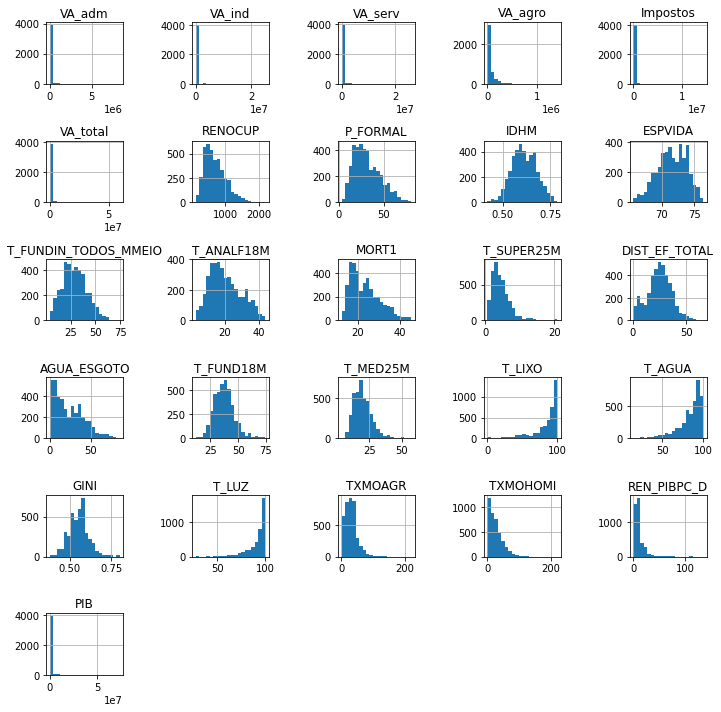

In [ ]:

df_amazonia.select_dtypes(['float64']).hist(bins = 20, figsize = (10,10))
plt.tight_layout()

A maioria das variaveis seguem uma distribuicao normal, ou seja, possuem media e mediana muito proximas. Por outro lado, PIB, Tx de Homicidio, T_LUZ, TXMOAGR, T_LIXO, AGUA_ESGOTO, REN_PVAIND nao.

As variaveis que nao seguem essa distribuicao pode-se assumir que um grande numero de cidades possui esses indicadores concentradas em niveis mais baixos ou mais altos, devido a forte assimetria.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

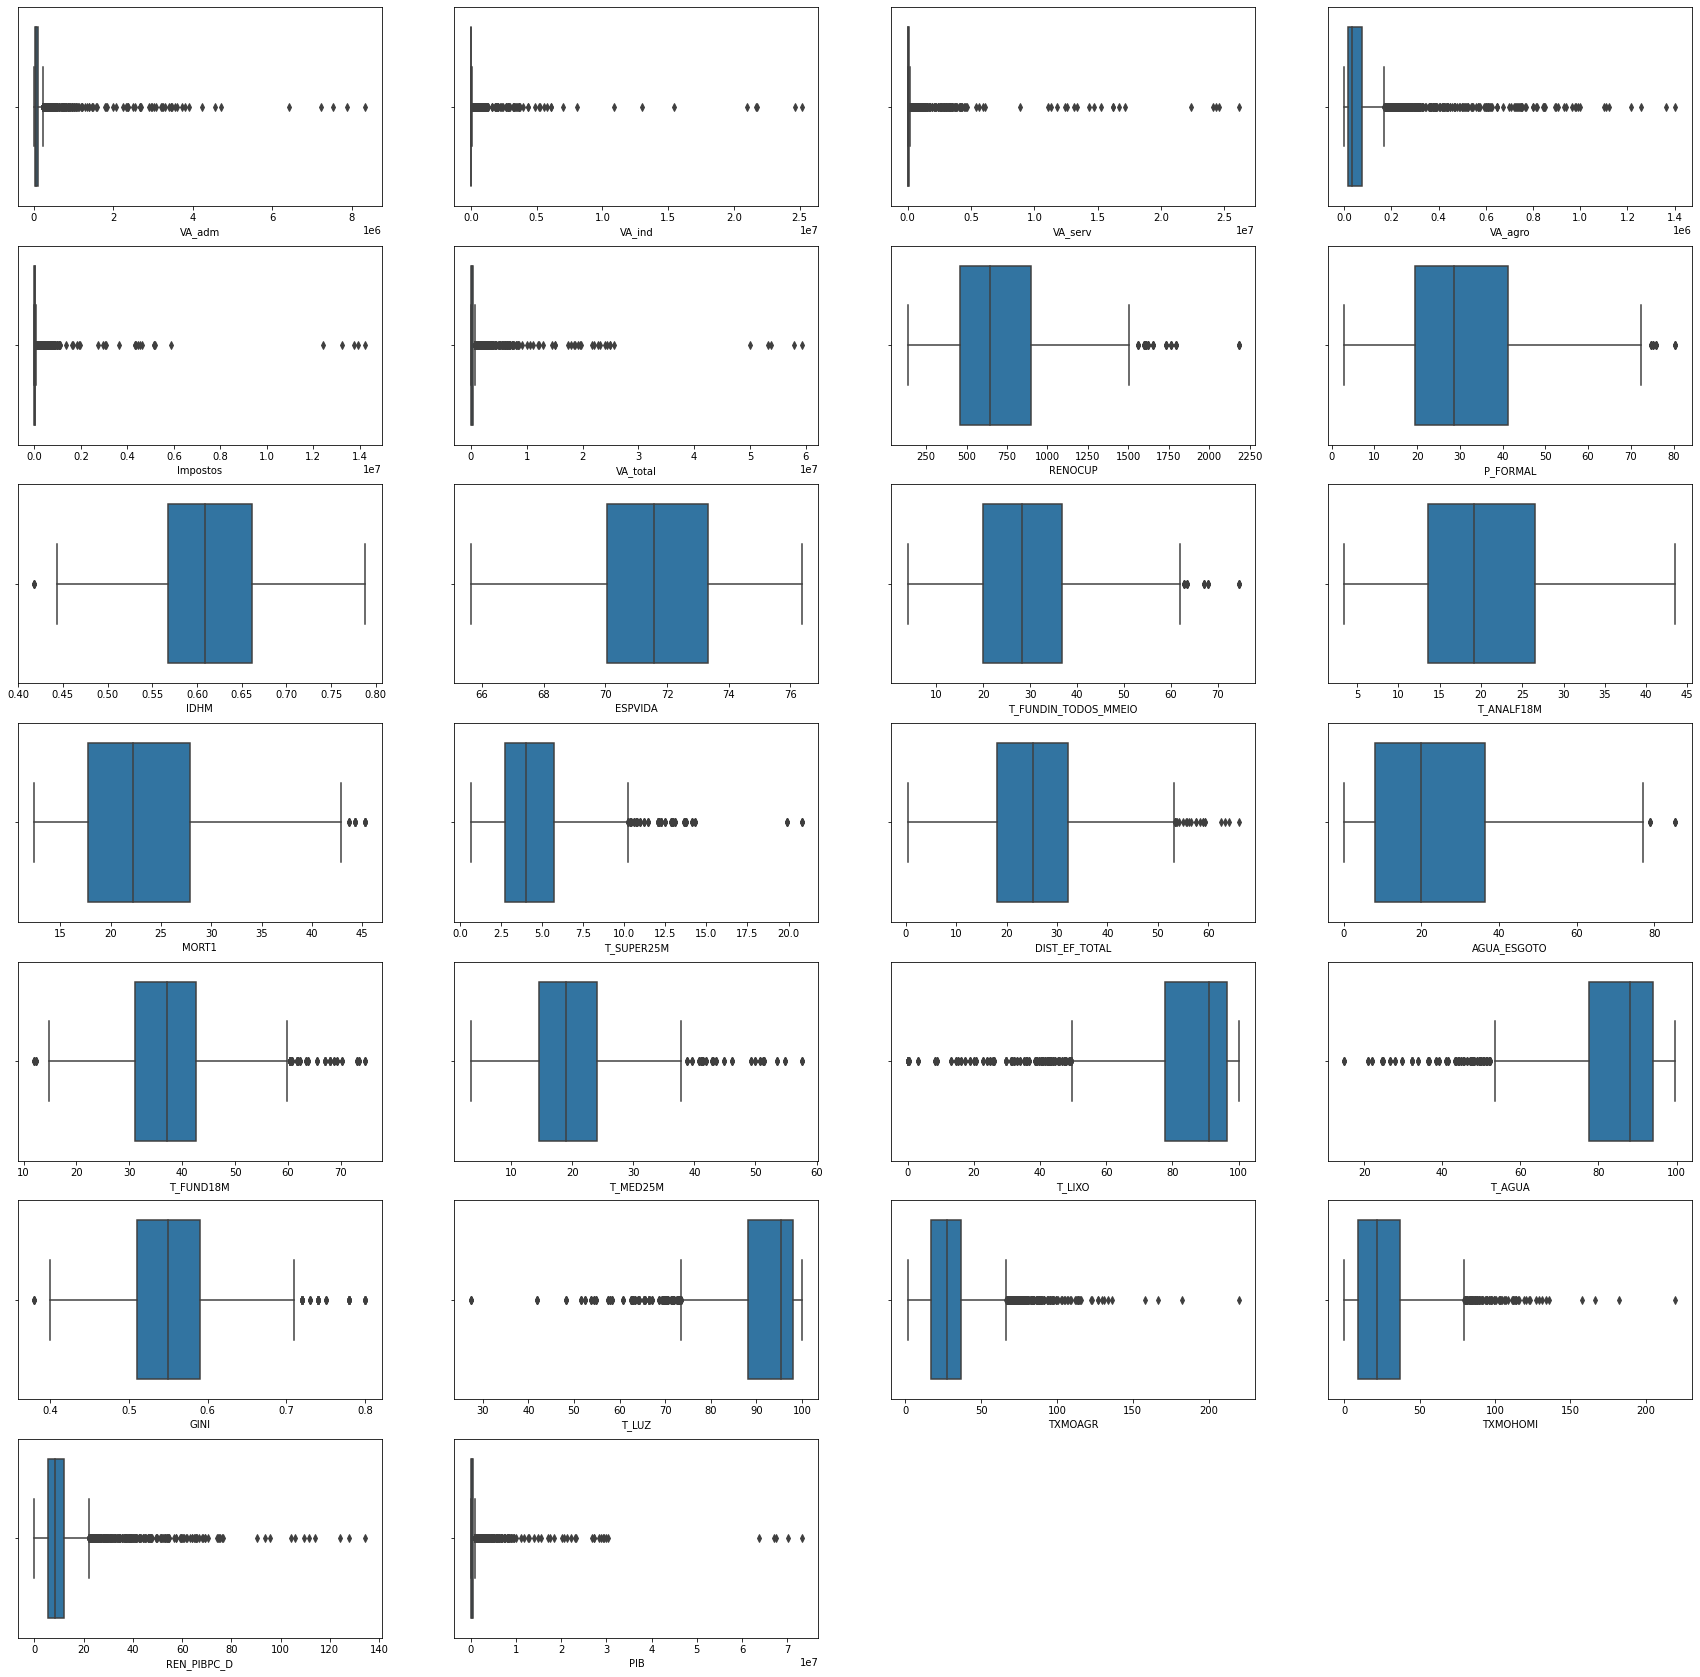

In [ ]:
plt.figure(1, figsize = (30,30))
for i, col in enumerate(df_amazonia.select_dtypes(['float64']).columns):
  plt.subplot(7,4,i+1)
  sns.boxplot(df_amazonia[col])

A maioria das variaveis apresentam outliers, porem, como sao dados que representam a realidade, os outliers serao considerados como parte do fenomeno.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Registros por Ano')

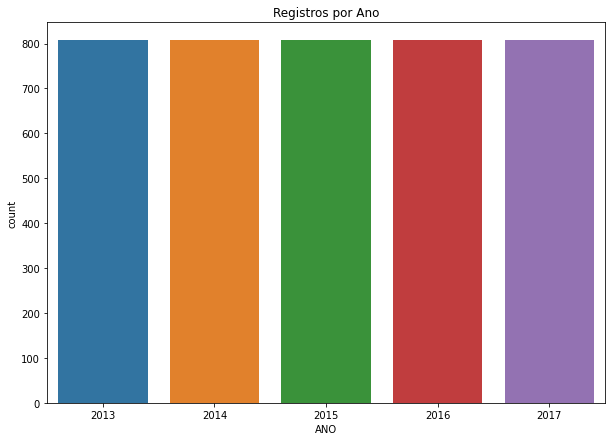

In [ ]:
# Numero de registros por ano
plt.figure(1, figsize = (10, 7))
sns.countplot(df_amazonia['ANO'])
plt.title('Registros por Ano')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Registros por Estado')

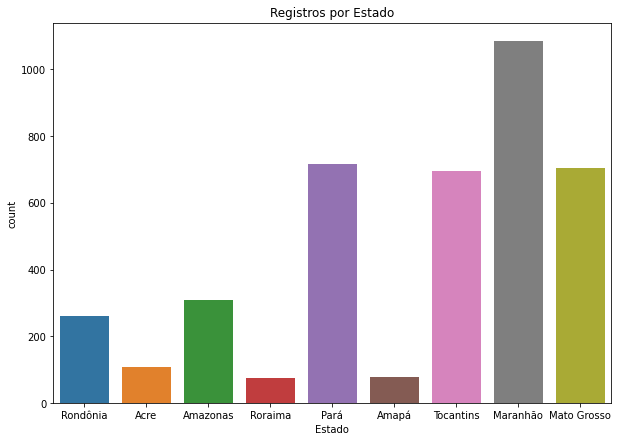

In [ ]:
# Numero de registros por estado
plt.figure(1, figsize = (10, 7))
sns.countplot(df_amazonia['Estado'])
plt.title('Registros por Estado')

Text(0.5, 1.0, 'Populacao por Estado')

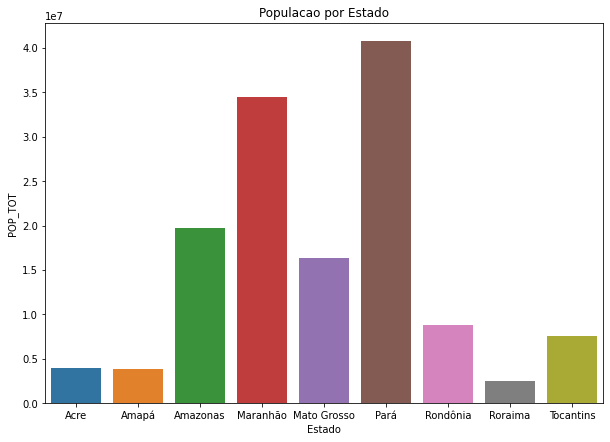

In [ ]:
aux = df_amazonia.groupby('Estado')['POP_TOT'].sum().reset_index()
plt.figure(1, figsize = (10,7))
sns.barplot(x = 'Estado', y = 'POP_TOT', data = aux)
plt.title('Populacao por Estado')

### Analise Bivariada

### H1: O estado do Maranhao é o que apresenta o maior PIB da Amazônia Legal
### H2: O PIB vem aumentando desde 2012 até 2017 com taxa de crescimento acelerada
### H3: Os estados que possuem maior taxa de emprego formal sao os que mais contribuem para o PIB
### H4: Os estados que possuem menos desigualdade possuem um PIB menor.
### H5: Estados que investem mais dinheiro publico possuem um PIB maior.
### H6: Estados que investem possuem um maior apoio da Industria um PIB maior.
### H7: O atraso em escolaridade reflete em uma diminuicao do PIB.
### H8: Estado que possuem uma qualidade de vida melhor (agua, luz, encanamento) possuem um PIB maior.
### H9: Estados que possuem mais apoio da Industria e do Governo tem um PIB maior dos que possuem mais apoio dos setores Agropecuários.
### H10: Os municípios com maior taxa de mortalidade/homicidio são os que possuem o menor PIB da Amazônia Legal.

### H11: A participacao do setor industrial vem caindo com o tempo, e consequentemente o PIB dos estados.

### H12: A participacao do setor agropecuario vem aumentando com o tempo, e consequentemente o PIB do pais.

### H13: Quanto maior a renda media do brasileiro acima de 18 anos, maior sera o PIB per capita.

### H14: Quanto maior a expectativa de vida do brasileiro, maior sera o PIB per capita.



### H1: O estado do Maranhao é o que apresenta o maior PIB da Amazônia Legal
Desde 2012, o estado com maior PIB por ano é o Pará (muito provavelmente devido à exploração madeireira e populacao), seguida do Mato Grosso, um dos principais representantes do Agronegócio do País.

In [ ]:
df_groups = df_amazonia.groupby(['ANO','Estado'])[manual_selection].agg(['median','mean','sum'])

Text(0, 0.5, 'PIB somado')

<Figure size 432x288 with 0 Axes>

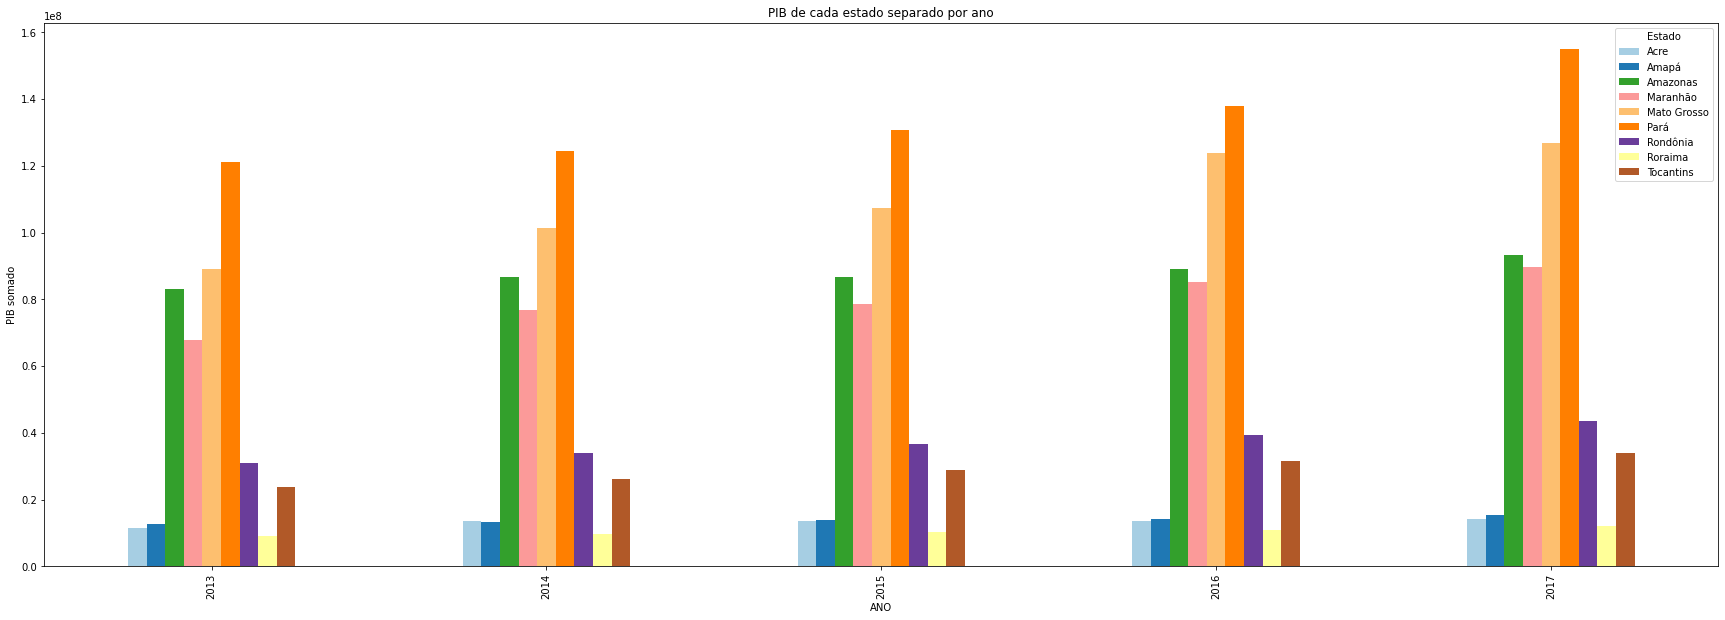

In [ ]:
plt.figure(1, )
df_groups['PIB', 'sum'].unstack().plot(kind='bar', figsize = (30,10), colormap='Paired')
plt.title('PIB de cada estado separado por ano')
plt.ylabel ('PIB somado')

### H2: O PIB vem aumentando desde 2012 até 2016 com taxa de crescimento acelerada
Verdade, o PIB dos estados vem crescendo desde 2012, com exceção do Amazonas em entre 2014-2015. Os estados que mais se destacam no crescimento anual é Mato Grosso, Tocantins e Rondônia, apresentando um bom crescimento ano após ano.

In [ ]:
df_groups_year = df_groups['PIB', 'sum'].reset_index().droplevel(1, axis="columns")

In [ ]:
df_groups_year.head()

,ANO,Estado,PIB
0,2013,Acre,1.147393e+07
1,2013,Amapá,1.276349e+07
2,2013,Amazonas,8.305123e+07
3,2013,Maranhão,6.769484e+07
4,2013,Mato Grosso,8.921292e+07


In [ ]:
df_br_year = df_br.groupby('ANO')[manual_selection].agg(['mean','sum'])

In [ ]:
df_br_year['Estado'] = 'Brasil'

In [ ]:
df_br_year = df_br_year.reset_index()

In [ ]:
df_br_aux = df_br_year[['ANO', 'Estado', 'PIB']].droplevel(1, axis="columns").iloc[:, [0, 1, -1]]

In [ ]:
#df_groups_year = pd.concat([df_groups_year, df_br_aux], axis = 0).reset_index()

In [ ]:
df_pct_year = df_groups_year.set_index(['ANO', 'Estado']).PIB.unstack().pct_change()*100
df_pct_year = df_pct_year.dropna().T.reset_index()
#df_pct_year['ANO'] = ['2013-2014', '2014-2015', '2015-2016']
df_pct_year.columns = ['Estado','2013-2014', '2014-2015', '2015-2016', '2016-2017']
df_pct_year

,Estado,2013-2014,2014-2015,2015-2016,2016-2017
0,Acre,17.298061,1.219317,0.964840,3.771205
1,Amapá,4.989212,3.440298,3.468953,7.947026
2,Amazonas,4.355638,-0.115912,2.855088,4.717452
3,Maranhão,13.512378,2.126397,8.708452,4.961572
4,Mato Grosso,13.475180,6.108389,15.325111,2.393926
5,Pará,2.763738,5.160615,5.502750,12.399251
6,Rondônia,9.349092,7.441310,7.923310,10.278134
7,Roraima,8.139156,5.118807,7.520641,9.910546
8,Tocantins,10.054632,10.465976,9.175592,7.989015


In [ ]:
df_pct_brasil_year = pd.DataFrame(['Brasil'] + df_br_aux['PIB'].pct_change().dropna().values.tolist()).T
df_pct_brasil_year.columns = ['Estado','2013-2014', '2014-2015', '2015-2016', '2016-2017']
df_pct_brasil_year['2013-2014'] = 100*df_pct_brasil_year['2013-2014']
df_pct_brasil_year['2014-2015'] = 100*df_pct_brasil_year['2014-2015']
df_pct_brasil_year['2015-2016'] = 100*df_pct_brasil_year['2015-2016']
df_pct_brasil_year['2016-2017'] = 100*df_pct_brasil_year['2016-2017']

df_pct_year = pd.concat([df_pct_year, df_pct_brasil_year], axis = 0)

In [ ]:
df_pct_year

,Estado,2013-2014,2014-2015,2015-2016,2016-2017
0,Acre,17.298061,1.219317,0.96484,3.771205
1,Amapá,4.989212,3.440298,3.468953,7.947026
2,Amazonas,4.355638,-0.115912,2.855088,4.717452
3,Maranhão,13.512378,2.126397,8.708452,4.961572
4,Mato Grosso,13.47518,6.108389,15.325111,2.393926
5,Pará,2.763738,5.160615,5.50275,12.399251
6,Rondônia,9.349092,7.44131,7.92331,10.278134
7,Roraima,8.139156,5.118807,7.520641,9.910546
8,Tocantins,10.054632,10.465976,9.175592,7.989015
0,Brasil,8.390206,3.752137,4.56222,5.042821


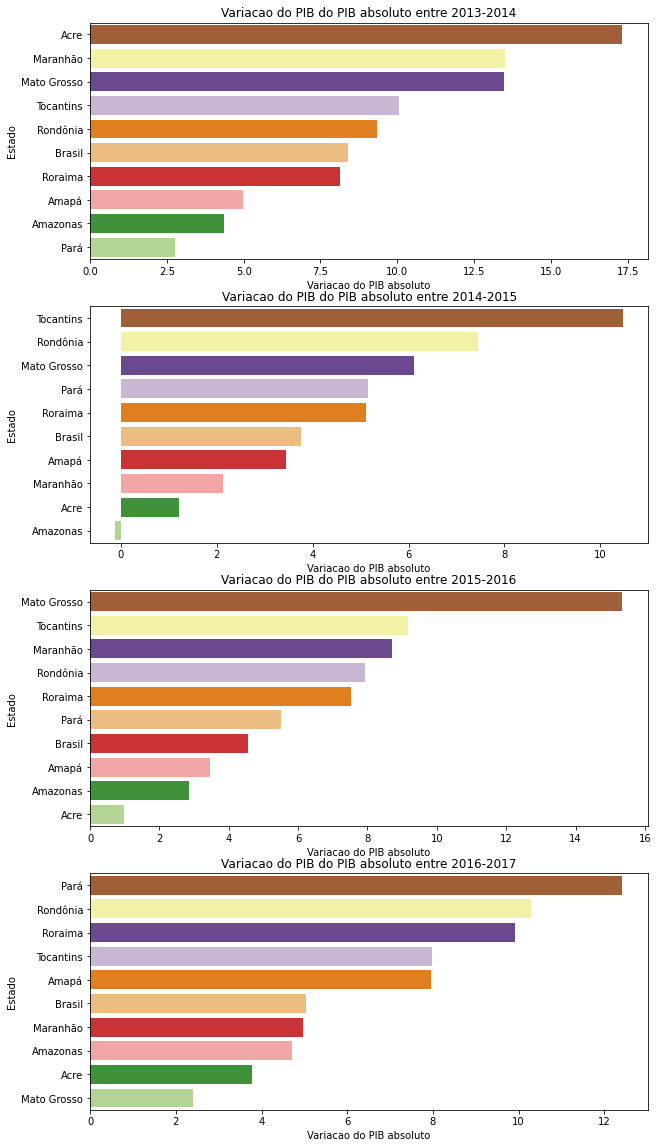

In [ ]:
i = 0
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (10,20))
for col in df_pct_year.columns[1:]:
  plt.subplot(4,1,i+1)
  sns.barplot(y = 'Estado', x = col, palette=np.array(pal[::-1]), data = df_pct_year.sort_values(col, ascending = False), orient = 'h')
  plt.title('Variacao do PIB do PIB absoluto entre {}'.format(col))
  plt.xlabel('Variacao do PIB absoluto')
  i = i+1

### H3: Os estados que possuem maior taxa de emprego formal sao os que mais contribuem para o PIB

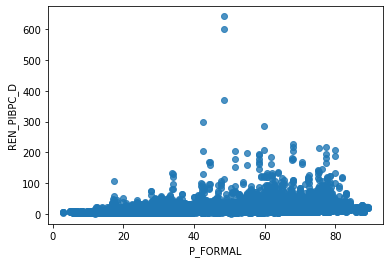

In [ ]:
sns.regplot(x = 'P_FORMAL', y = 'REN_PIBPC_D', data = df_analyzed)

In [ ]:
df_groups = df_groups.reset_index()

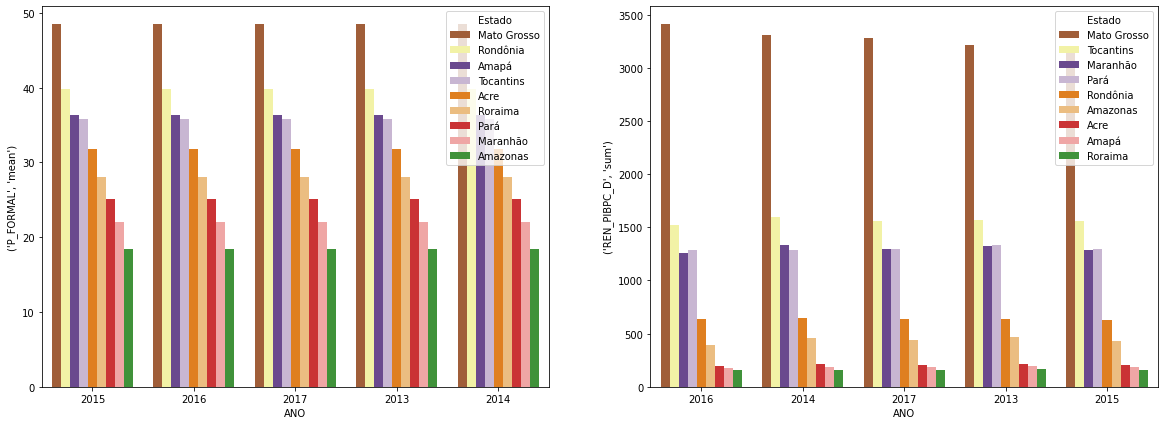

In [ ]:
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x ='ANO', y = ('P_FORMAL','mean'), hue = 'Estado', palette = np.array(pal[::-1]), data = df_groups.sort_values(('P_FORMAL','mean'), ascending = False))
plt.subplot(1,2,2)
sns.barplot(x ='ANO', y = ('REN_PIBPC_D','sum'), hue = 'Estado', palette =np.array(pal[::-1]), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))


Percebe-se que alguns estados possuem um maior nivel de trabalho formal, e tambem PIB per capita mais elevado, entretanto, nao eh uma correlacao forte. Por exemplo, Maranhao possui um indice baixíssimo de trabalho formal, mas possui um PIB per capita alto.

### H4: Os estados que possuem menos desigualdade possuem um PIB maior.

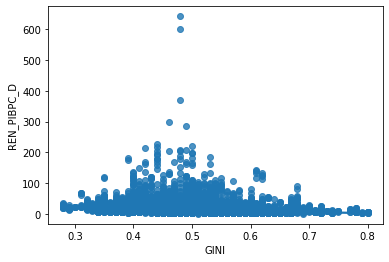

In [ ]:
sns.regplot(x = 'GINI', y = 'REN_PIBPC_D', data = df_analyzed)

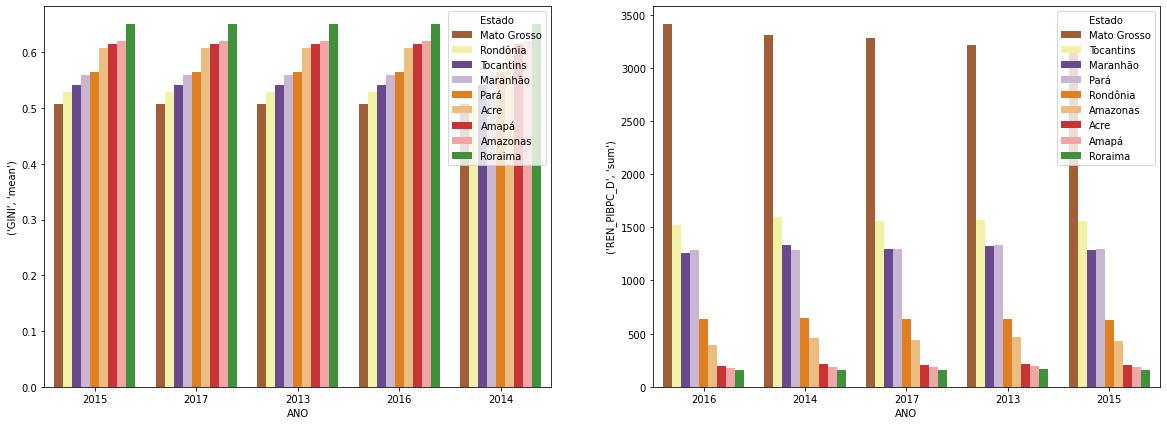

In [ ]:
pal = sns.color_palette("Paired")
plt.figure(1, figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x ='ANO', y = ('GINI','mean'), hue = 'Estado', palette = np.array(pal[::-1]),data = df_groups.sort_values(('GINI','mean'), ascending = True))
plt.subplot(1,2,2)
sns.barplot(x ='ANO', y = ('REN_PIBPC_D','sum'), hue = 'Estado',  palette = np.array(pal[::-1]), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))


Quanto maior a desigualdade, mais baixo sera o PIB per capita da regiao. É possivel perceber isso pegando os top 4 estados com menor PIB e maior indice GINI (desigualdade).

Top 4 estados com menor PIB:
- Roraima, Amapa, Acre, Amazonas

Top 4 estados com mais desigualdades:
- Roraima, Amazonas, Amapa, Acre

In [ ]:
df_censo = pd.merge(df_censo, df[['Estado','IBGE7']], on = 'IBGE7', how = 'left')

In [ ]:
df_censo_groups = df_censo.groupby(['ANO','Estado'])['GINI'].mean().reset_index()

In [ ]:
df_pct_censo_year = df_censo_groups.set_index(['ANO', 'Estado']).GINI.unstack().pct_change()*100

In [ ]:
df_pct_censo_year = df_censo_groups.set_index(['ANO', 'Estado']).GINI.unstack().pct_change()*100
df_pct_censo_year = df_pct_censo_year.dropna().T.reset_index()
#df_pct_year['ANO'] = ['2013-2014', '2014-2015', '2015-2016']
df_pct_censo_year.columns = ['Estado','1991-2000', '2000-2010']
df_pct_censo_year['var_anual'] = (df_pct_censo_year['1991-2000'] + df_pct_censo_year['2000-2010'])/(2010 - 1991)

In [ ]:
df_pct_gini_amazonia = df_pct_censo_year[df_pct_censo_year['Estado'].isin(estados_amazonia_legal)].sort_values('var_anual')

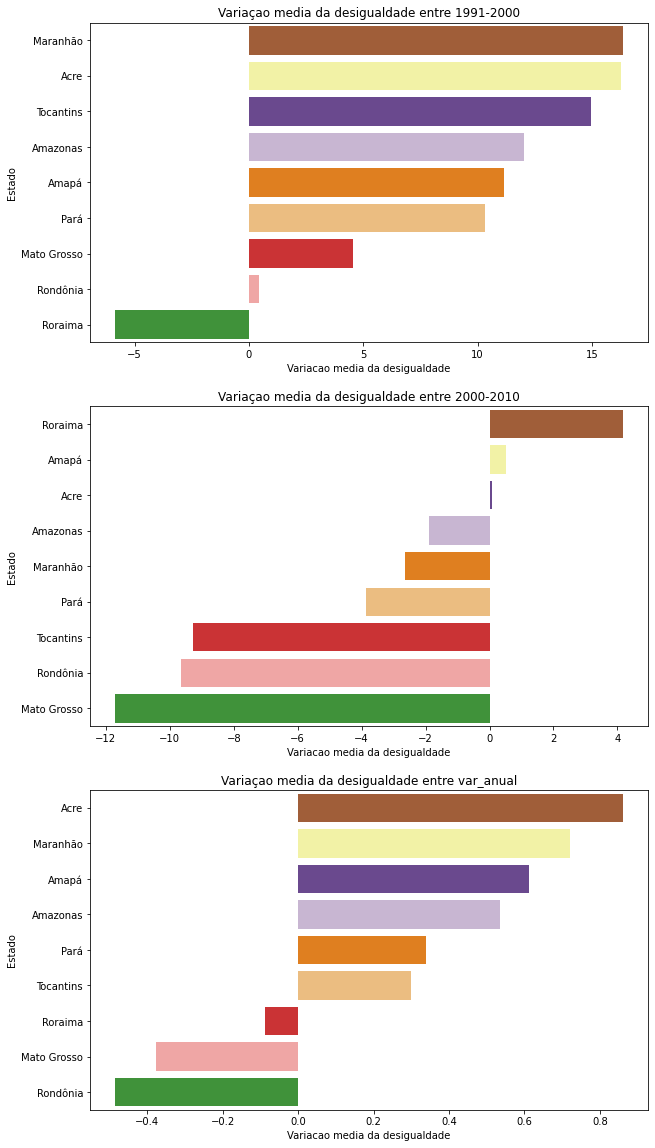

In [ ]:
i = 0
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (10,20))
for col in df_pct_gini_amazonia.columns[1:]:
  plt.subplot(3,1,i+1)
  sns.barplot(y = 'Estado', x = col, palette=np.array(pal[::-1]), data = df_pct_gini_amazonia.sort_values(col, ascending = False), orient = 'h')
  plt.title('Variaçao media da desigualdade entre {}'.format(col))
  plt.xlabel('Variacao media da desigualdade')
  i = i+1

Em um intervalo de 20 anos, os estados que possuem uma maior reduçao de desigualdade por ano, em media, sao Mato Grosso, Rondonia e Roraima. Os demais apresentaram uma media de crescimento da desigualdade por ano.

### H5: Estados que investem mais dinheiro publico possuem um PIB maior.
Falso, aparentemente quanto menos investimentos do estado, maior sera o PIB.

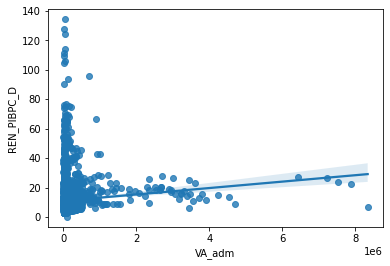

In [ ]:
sns.regplot(x = 'VA_adm', y = 'REN_PIBPC_D', data = df_amazonia)

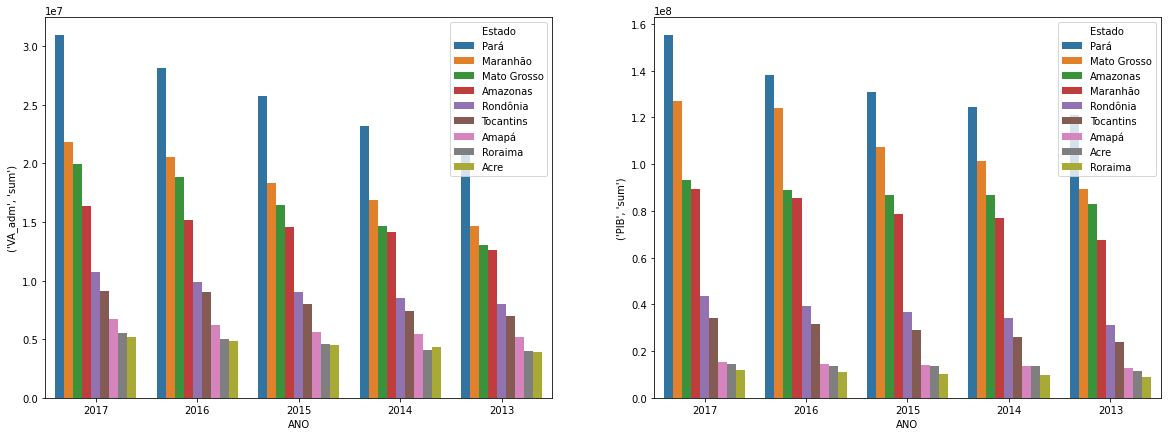

In [ ]:
plt.figure(1, figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x ='ANO', hue = 'Estado', y = ('VA_adm','sum'), data = df_groups.sort_values(('VA_adm','sum'), ascending = False))
plt.subplot(1,2,2)
sns.barplot(x ='ANO', hue = 'Estado', y = ('PIB','sum'), data = df_groups.sort_values(('PIB','sum'), ascending = False))


In [ ]:
def divide_two_cols(df):
    df['Participacao_adm'] = 100*df['VA_adm'] / df['PIB']
    df['Participacao_serv'] = 100*df['VA_serv'] / df['PIB']
    df['Participacao_agro'] = 100*df['VA_agro'] / df['PIB']
    df['Participacao_ind'] = 100*df['VA_ind'] / df['PIB']
    df['Participacao_impostos'] = 100*df['Impostos'] / df['PIB']

    return df

In [ ]:
df_participacoes = df_amazonia.groupby(['ANO','Estado']).apply(divide_two_cols)[['Participacao_adm', 'Participacao_serv', 'Participacao_agro', 'Participacao_ind', 'Participacao_impostos','ANO','Estado']]

In [ ]:
df_participacoes = df_participacoes.groupby(['ANO','Estado']).mean()

In [ ]:
df_participacoes

Participacao_adm  Participacao_serv  Participacao_agro  \
ANO  Estado                                                                
2013 Acre                49.049790          17.121391          24.438919   
     Amapá               53.180726          20.616505           9.400655   
     Amazonas            47.129907          14.693319          28.878015   
     Maranhão            40.535689          26.402465          21.911849   
     Mato Grosso         23.761767          24.545341          32.252365   
     Pará                33.201225          20.678966          29.861624   
     Rondônia            34.672253          22.061030          27.899085   
     Roraima             62.062143          13.511907          14.169649   
     Tocantins           44.296509          20.578628          22.121453   
2014 Acre                47.560529          18.059208          24.941593   
     Amapá               55.271073          21.811272          10.143382   
     Amazonas            47.354883          16.894206          26.224859   
     Maranhão            40.525915          27.377480          20.711472   
     Mato Grosso         23.491922          26.540539          31.252604   
     Pará                34.270098          22.443259          26.542970   
     Rondônia            33.221865          22.649363          29.339204   
     Roraima             61.795463          15.552148          13.762140   
     Tocantins           43.158813          20.259697          24.438999   
2015 Acre                47.633153          18.846342          24.427006   
     Amapá               54.816043          20.294334           9.720898   
     Amazonas            47.117637          16.764566          27.370469   
     Maranhão            41.847217          26.315475          19.211645   
     Mato Grosso         23.755727          27.453821          30.571777   
     Pará                34.334278          22.476980          26.247789   
     Rondônia            32.643991          22.552662          30.416858   
     Roraima             61.337635          14.347195          16.124662   
     Tocantins           42.466656          21.324063          24.822103   
2016 Acre                47.706366          19.019396          24.551827   
     Amapá               54.543119          19.552715           9.436073   
     Amazonas            46.338767          18.316461          27.292227   
     Maranhão            42.091041          29.410207          16.109244   
     Mato Grosso         23.389668          26.264983          32.352985   
     Pará                33.380199          22.797162          27.410337   
     Rondônia            32.546632          22.259080          30.845882   
     Roraima             61.977486          14.820955          15.147568   
     Tocantins           43.351536          20.648405          24.958973   
2017 Acre                49.207199          19.591452          22.001482   
     Amapá               56.031401          19.173308           9.159349   
     Amazonas            47.392295          19.216474          24.855236   
     Maranhão            43.269498          28.136104          16.977215   
     Mato Grosso         24.441702          27.838688          28.625742   
     Pará                35.173615          22.302697          25.562096   
     Rondônia            32.022660          21.248237          33.044359   
     Roraima             63.245869          14.714252          14.121744   
     Tocantins           41.091709          22.301798          24.767395   

                  Participacao_ind  Participacao_impostos  
ANO  Estado                                                
2013 Acre                 5.615242               3.774658  
     Amapá               11.412179               5.389936  
     Amazonas             7.268909               2.029850  
     Maranhão             7.138933               4.011065  
     Mato Grosso         10.982785               8.457742  
     Pará                

<Figure size 432x288 with 0 Axes>

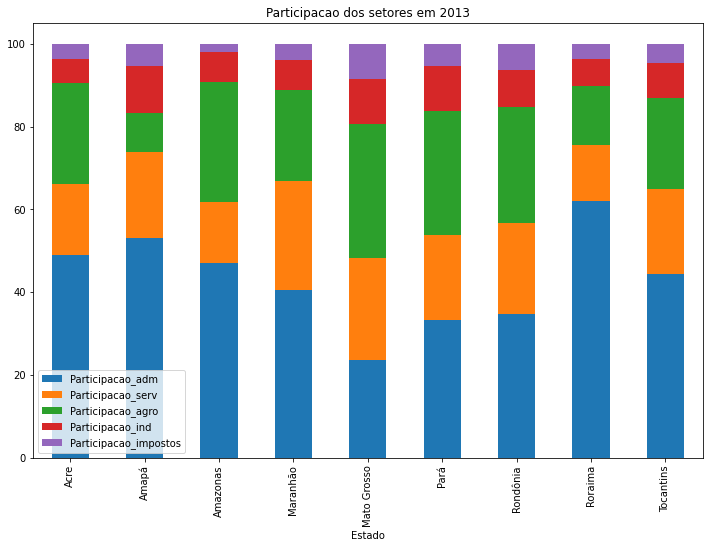

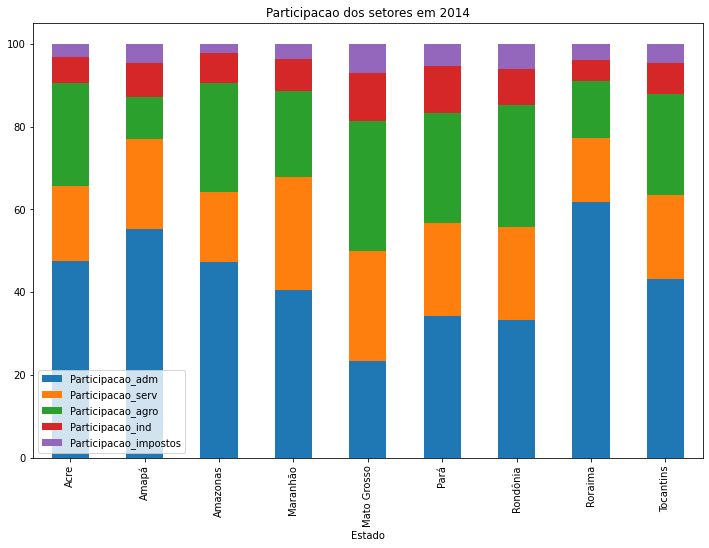

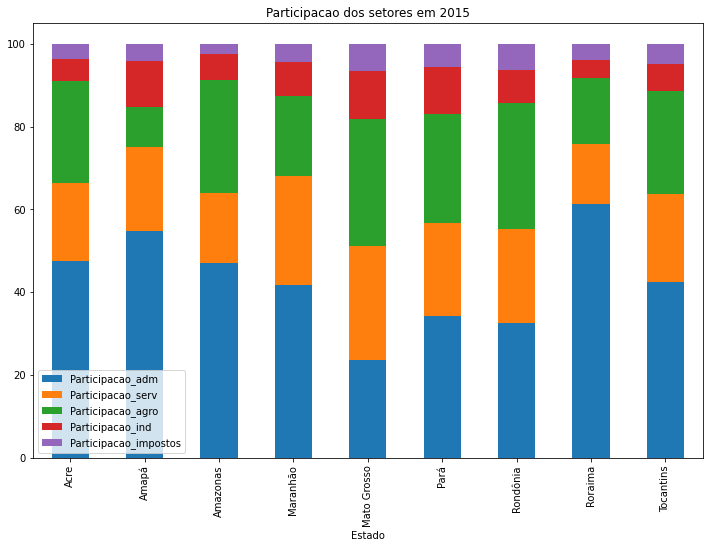

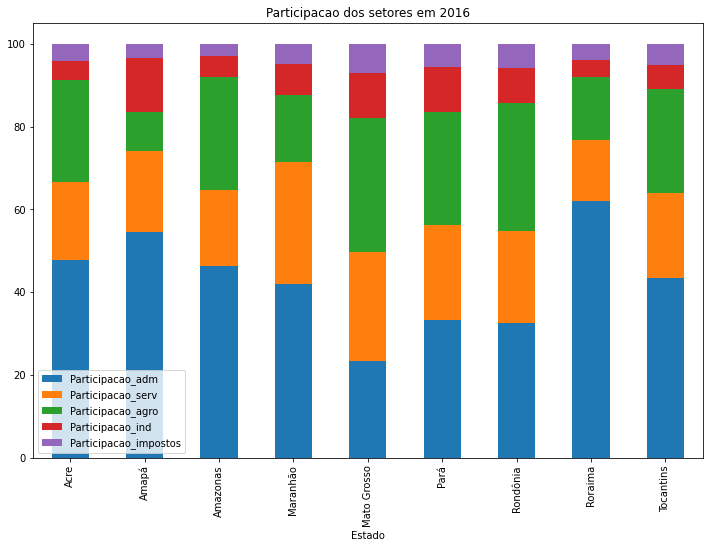

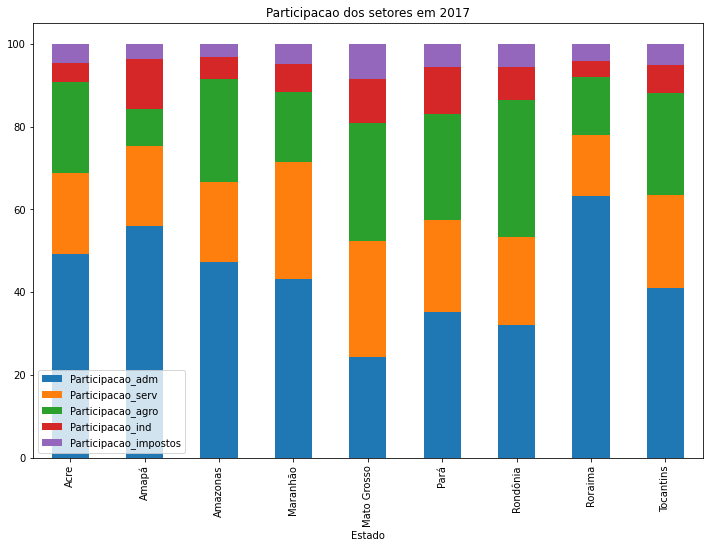

In [ ]:
j = 0
for ano in ['2013', '2014', '2015', '2016', '2017']:
  plt.figure(j+1)
  aux = df_participacoes.loc[ano].plot(kind = 'bar', stacked = True, figsize = (12, 8))
  plt.title('Participacao dos setores em {}'.format(ano))

In [ ]:
df_participacoes_1317 = df_participacoes.loc[['2017','2013']]

In [ ]:
df_part_pct_year = df_participacoes_1317.unstack().diff()
df_part_pct_year = df_participacoes_1317.dropna().T.reset_index()

In [ ]:
df_var_1317 = df_participacoes_1317.groupby(level=[1]).diff().dropna()

In [ ]:
df_var_1317 = df_var_1317.reset_index()

In [ ]:
df_var_1317

,ANO,Estado,Participacao_adm,Participacao_serv,Participacao_agro,Participacao_ind,Participacao_impostos
0,2013,Acre,-0.157409,-2.470061,2.437437,1.058962,-0.868929
1,2013,Amapá,-2.850675,1.443197,0.241307,-0.517409,1.683581
2,2013,Amazonas,-0.262388,-4.523155,4.022779,1.881662,-1.118898
3,2013,Maranhão,-2.733810,-1.733639,4.934634,0.478223,-0.945408
4,2013,Mato Grosso,-0.679935,-3.293347,3.626624,0.339968,0.006691
5,2013,Pará,-1.972390,-1.623731,4.299528,-0.556845,-0.146562
6,2013,Rondônia,2.649593,0.812793,-5.145274,1.063094,0.619794
7,2013,Roraima,-1.183726,-1.202344,0.047905,2.626729,-0.288564
8,2013,Tocantins,3.204800,-1.723170,-2.645942,1.765024,-0.600712


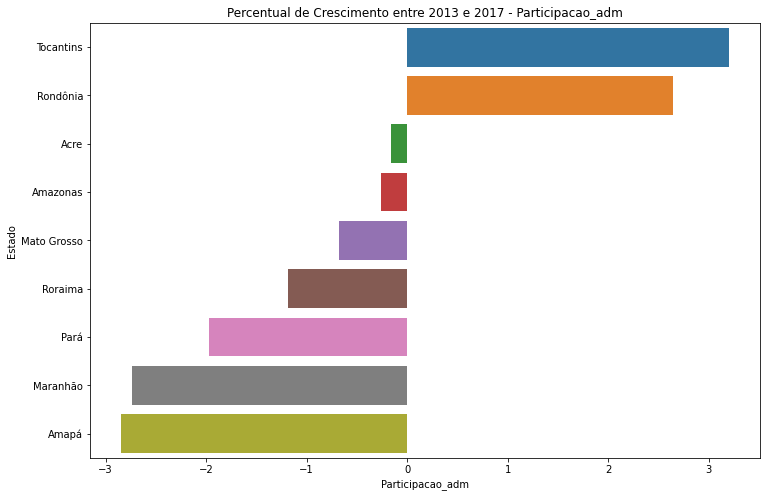

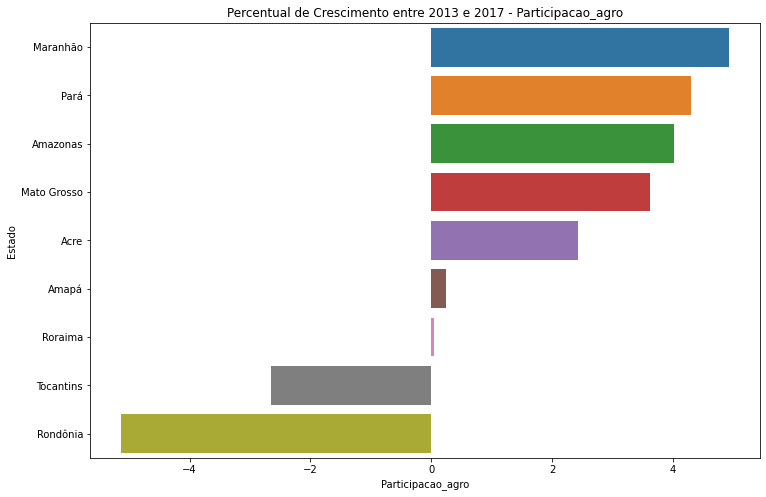

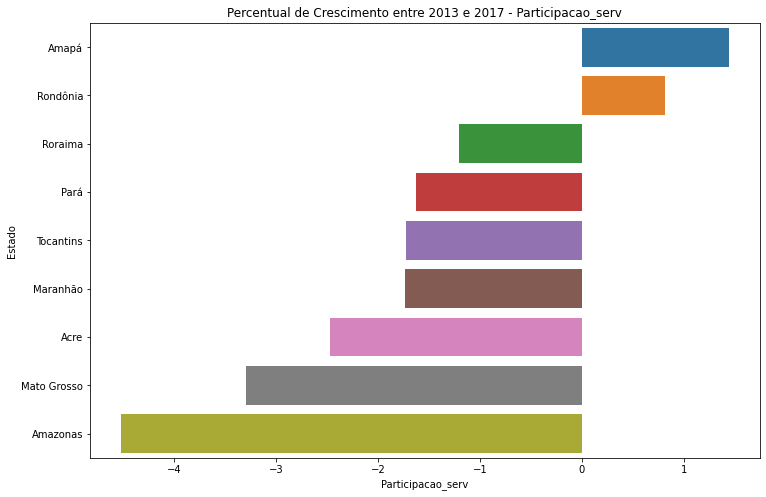

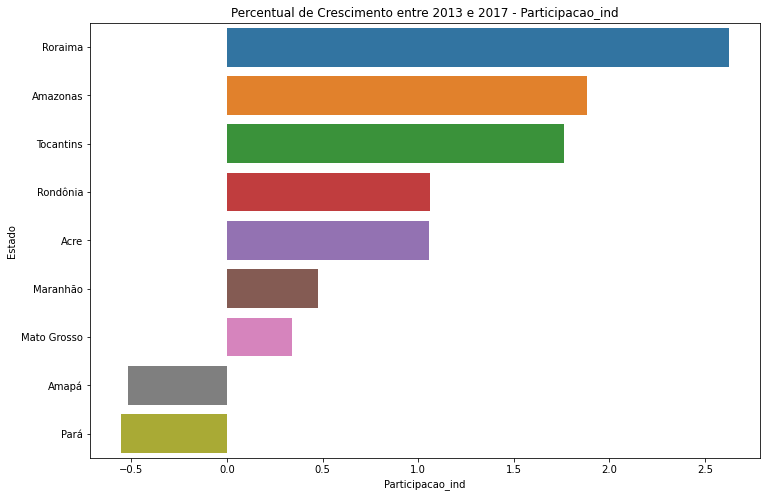

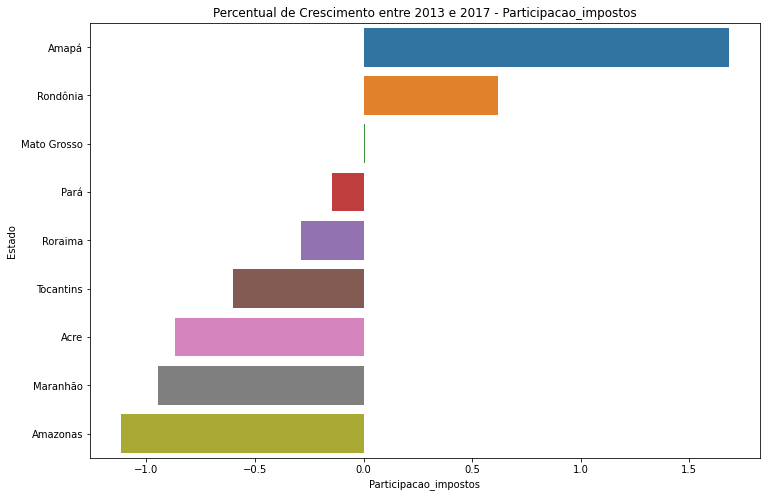

In [ ]:
j = 1
for part in ['Participacao_adm','Participacao_agro','Participacao_serv','Participacao_ind','Participacao_impostos']:
  plt.figure(j, figsize = (12,8))
  sns.barplot(y = 'Estado', x = part, data = df_var_1317.sort_values(part, ascending = False), orient = 'h')
  plt.title('Percentual de Crescimento entre 2013 e 2017 - {}'.format(part))
  j = j+1

In [ ]:
df_va_agro_group = df_amazonia.groupby(['ANO','Estado'])['VA_agro'].sum().reset_index()

In [ ]:
df_diff_va_agro_year = df_va_agro_group.set_index(['ANO', 'Estado']).VA_agro.unstack().diff()*1e3
df_diff_va_agro_year = df_diff_va_agro_year.dropna().T.reset_index()
#df_pct_year['ANO'] = ['2013-2014', '2014-2015', '2015-2016']
df_diff_va_agro_year.columns = ['Estado','2013-2014', '2014-2015', '2015-2016', '2016-2017']
#df_pct_va_agro_year['var_anual'] = (df_pct_va_agro_year['2013-2014'] + df_pct_censo_year['2014-2015'] + df_pct_censo_year['2015-2016'])/(2017-2013)

In [ ]:
df_diff_va_agro_year['var_anual'] =  df_diff_va_agro_year.iloc[:, 1:].mean(axis = 1).values.tolist() 

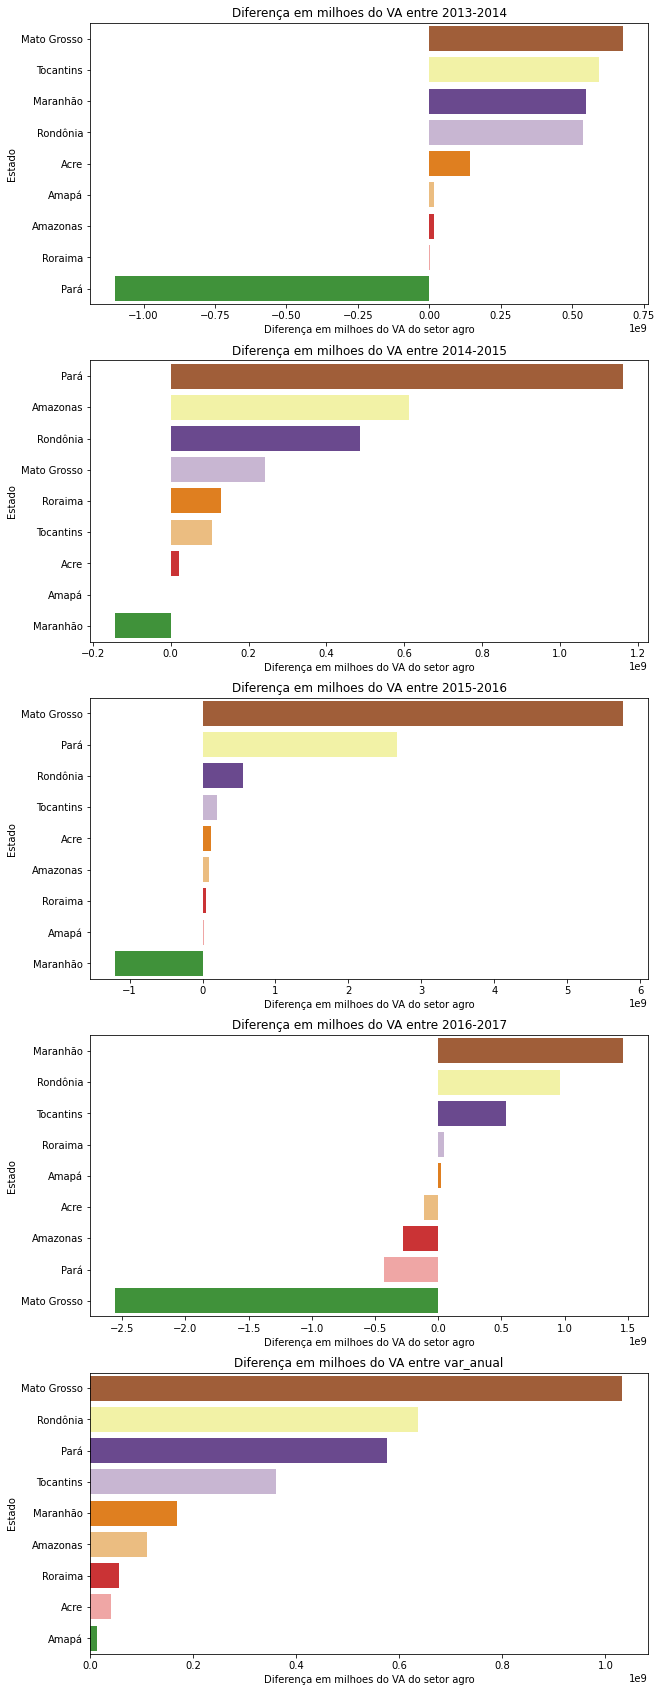

In [ ]:
i = 0
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (10,30))
for col in df_diff_va_agro_year.columns[1:]:
  plt.subplot(5,1,i+1)
  sns.barplot(y = 'Estado', x = col, palette=np.array(pal[::-1]), data = df_diff_va_agro_year.sort_values(col, ascending = False), orient = 'h')
  plt.title('Diferença em milhoes do VA entre {}'.format(col))
  plt.xlabel('Diferença em milhoes do VA do setor agro')
  i = i+1

Fazendo uma comparacao entre 2013 e 2017, é possível perceber que a indústria está aumentando aos poucos, porém, 2 estados apresentam baixo crescimento nesse setor, que são Amapá e Pará.  Já na administração pública, a maioria dos estados apresentam uma redução de investimentos e consequentemente PIB.

Os estados que mais apresentam crescimento do setor agropecuário é Maranhão, Pará, Amazonas e Mato Grosso, chegando a 4% de crescimento.

Alem disso, a media de crescimento atual do Mato Grossso chega a 1 bilhao de acrescimo no valor adicionado, seguido por Rondonia e Para.

### H6: Estados que investem possuem um maior apoio da Industria um PIB maior.

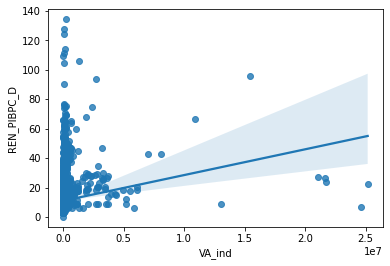

In [ ]:
sns.regplot(x = 'VA_ind', y = 'REN_PIBPC_D', data = df_amazonia)

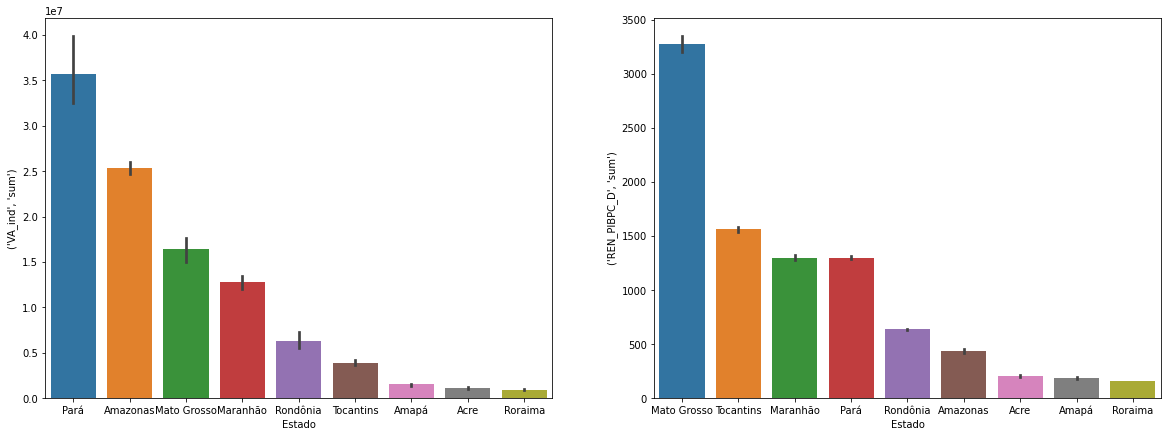

In [ ]:
plt.figure(1, figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x ='Estado', y = ('VA_ind','sum'), data = df_groups.sort_values(('VA_ind','sum'), ascending = False))
plt.subplot(1,2,2)
sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))


In [ ]:
df_va_ind_group = df_amazonia.groupby(['ANO','Estado'])['VA_ind'].sum().reset_index()

In [ ]:
df_diff_va_ind_year = df_va_ind_group.set_index(['ANO', 'Estado']).VA_ind.unstack().diff()*1e3
df_diff_va_ind_year = df_diff_va_ind_year.dropna().T.reset_index()
#df_pct_year['ANO'] = ['2013-2014', '2014-2015', '2015-2016']
df_diff_va_ind_year.columns = ['Estado','2013-2014', '2014-2015', '2015-2016', '2016-2017']
#df_pct_va_agro_year['var_anual'] = (df_pct_va_agro_year['2013-2014'] + df_pct_censo_year['2014-2015'] + df_pct_censo_year['2015-2016'])/(2017-2013)

In [ ]:
df_diff_va_ind_year['var_anual'] =  df_diff_va_ind_year.iloc[:, 1:].mean(axis = 1).values.tolist() 

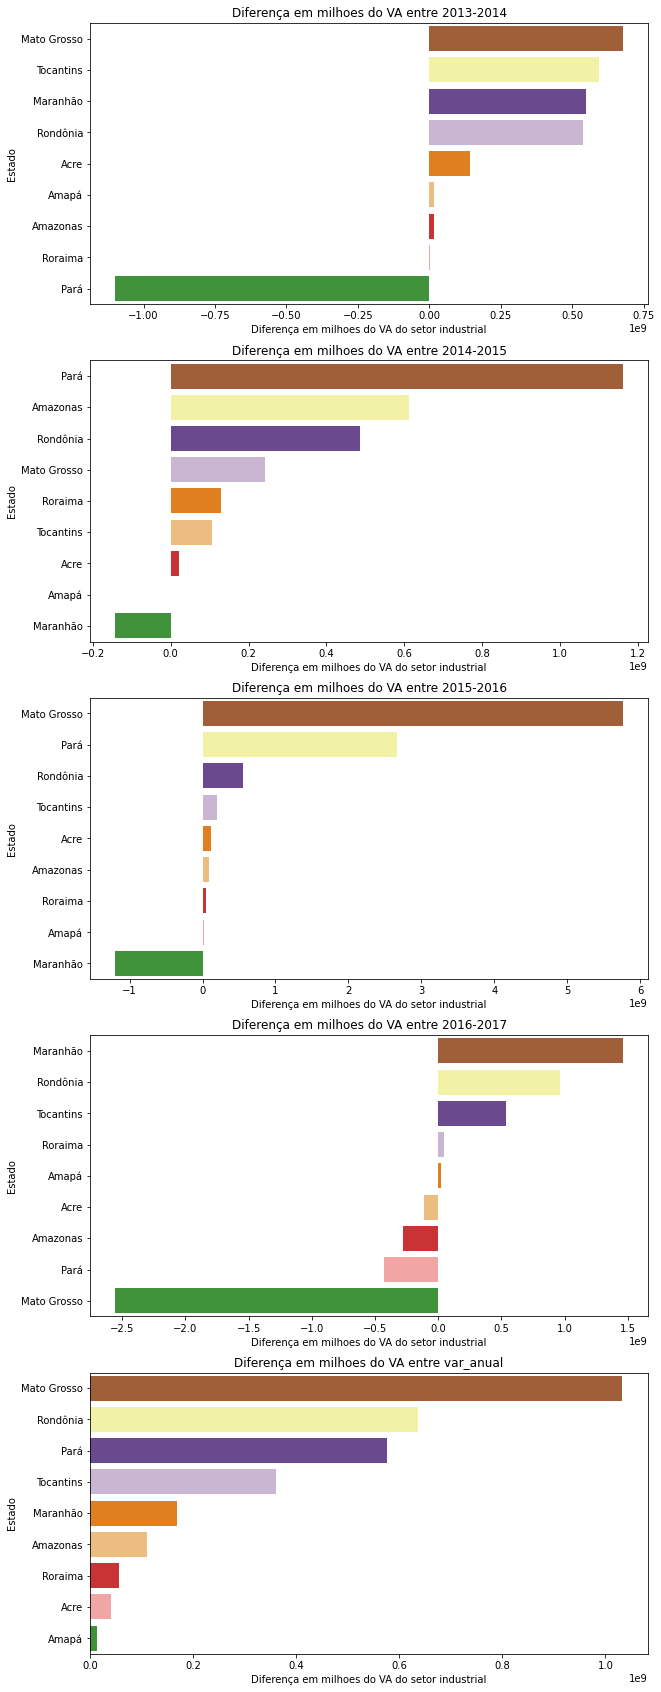

In [ ]:
i = 0
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (10,30))
for col in df_diff_va_agro_year.columns[1:]:
  plt.subplot(5,1,i+1)
  sns.barplot(y = 'Estado', x = col, palette=np.array(pal[::-1]), data = df_diff_va_agro_year.sort_values(col, ascending = False), orient = 'h')
  plt.title('Diferença em milhoes do VA entre {}'.format(col))
  plt.xlabel('Diferença em milhoes do VA do setor industrial')
  i = i+1

Pará e Amazonas possuem um grande parque industrial , porém, não conseguem contribuir tanto quanto o Agronegócio representado pelo Mato Grosso principalmente. 

### H7: O atraso em escolaridade reflete em uma diminuicao do PIB.

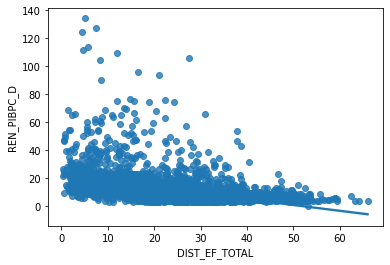

In [ ]:
sns.regplot(x = 'DIST_EF_TOTAL', y = 'REN_PIBPC_D', data = df_amazonia)

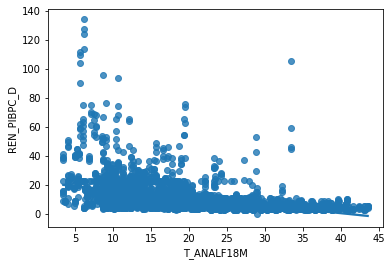

In [ ]:
sns.regplot(x = 'T_ANALF18M', y = 'REN_PIBPC_D', data = df_amazonia)

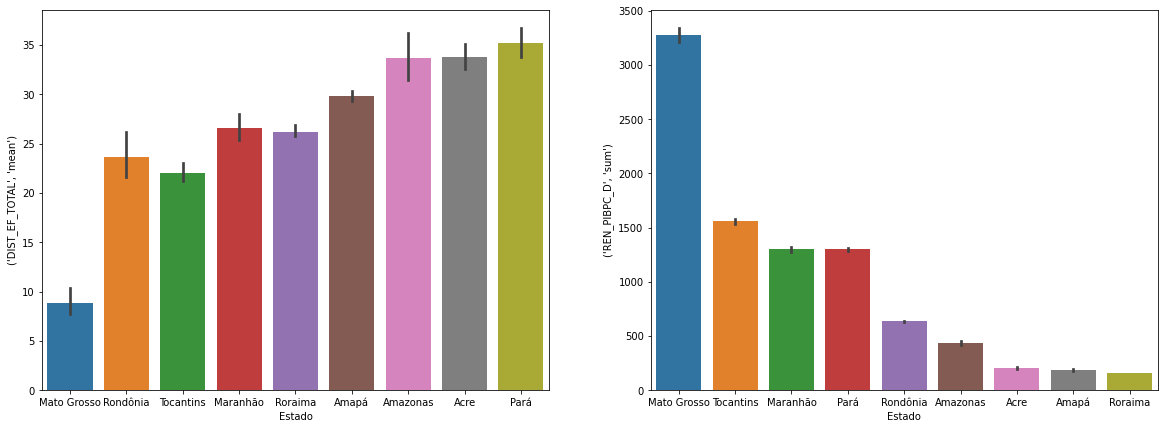

In [ ]:
plt.figure(1, figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x ='Estado', y = ('DIST_EF_TOTAL','mean'), data = df_groups.sort_values(('DIST_EF_TOTAL','mean'), ascending = True))
plt.subplot(1,2,2)
sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))


Percebe-se que quanto maior o atraso escolar dos alunos, menor o PIB do país. Com exceção do Pará, que possui o maior indice de atraso mas possui um PIB consideravel para a Região. 

### H8: Estado que possuem uma qualidade de vida melhor (agua, luz, encanamento) possuem um PIB maior.

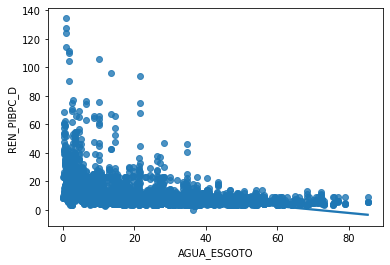

In [ ]:
sns.regplot(x = 'AGUA_ESGOTO', y = 'REN_PIBPC_D', data = df_amazonia)

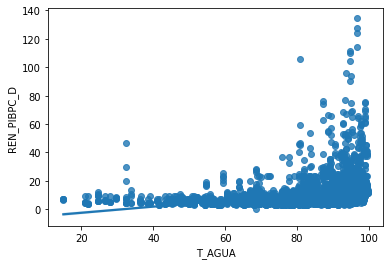

In [ ]:
sns.regplot(x = 'T_AGUA', y = 'REN_PIBPC_D', data = df_amazonia)

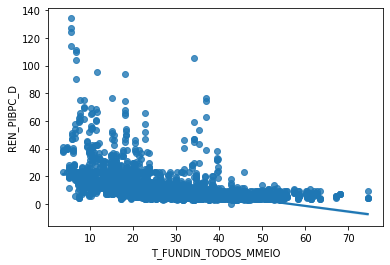

In [ ]:
sns.regplot(x = 'T_FUNDIN_TODOS_MMEIO', y = 'REN_PIBPC_D', data = df_amazonia)


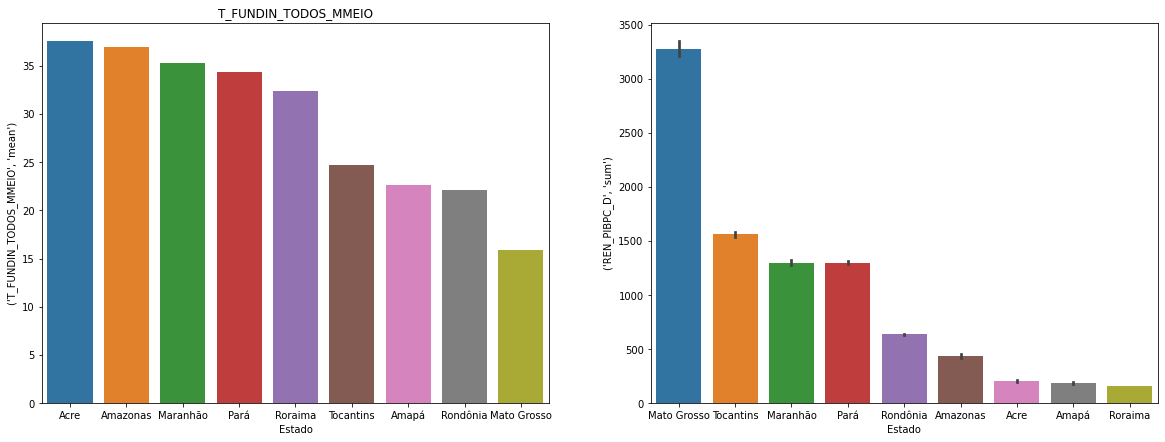

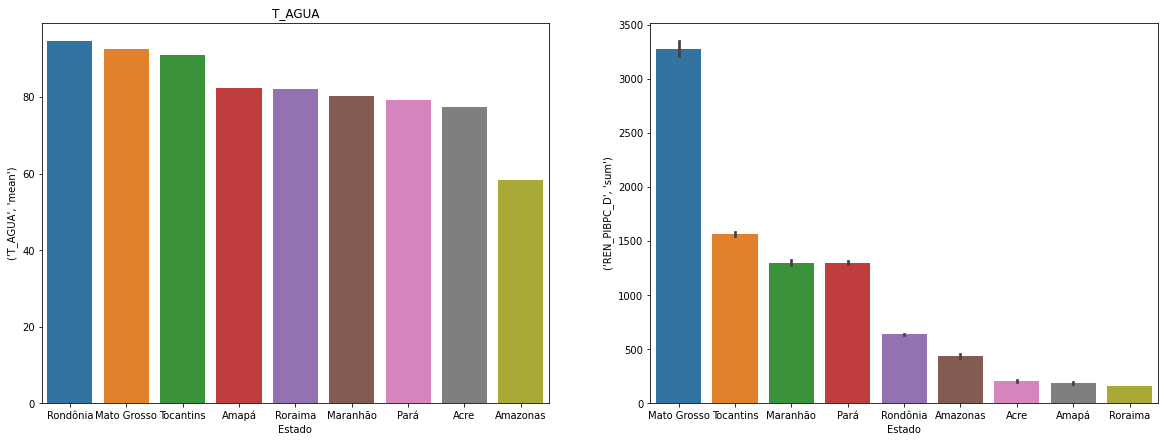

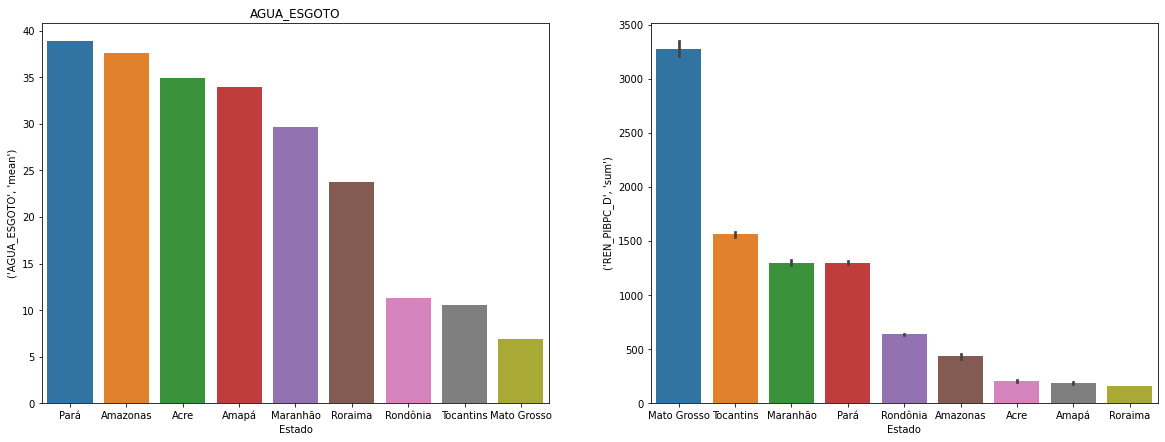

In [ ]:
i = 1
for col in ['T_FUNDIN_TODOS_MMEIO', 'T_AGUA', 'AGUA_ESGOTO']:
  plt.figure(i, figsize = (20,7))
  plt.subplot(1,2,1)
  sns.barplot(x ='Estado', y = (col,'mean'), data = df_groups.sort_values((col,'mean'), ascending = False))
  plt.title(col)
  plt.subplot(1,2,2)
  sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))

  i = i+1

Podemos afirmar que a qualidade de vida é importante para garantir á populacao uma vida digna e que possa contribuir ao longo da vida para o PIB. Entreanto, isso nao parecer ter um efeito tão grande na variavel alvo.

### H10: Os municípios com maior taxa de mortalidade/homicidio são os que possuem o menor PIB da Amazônia Legal.

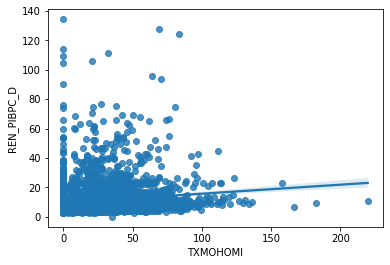

In [ ]:
sns.regplot(x = 'TXMOHOMI', y = 'REN_PIBPC_D', data = df_amazonia)

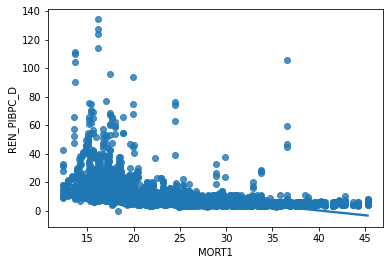

In [ ]:
sns.regplot(x = 'MORT1', y = 'REN_PIBPC_D', data = df_amazonia)

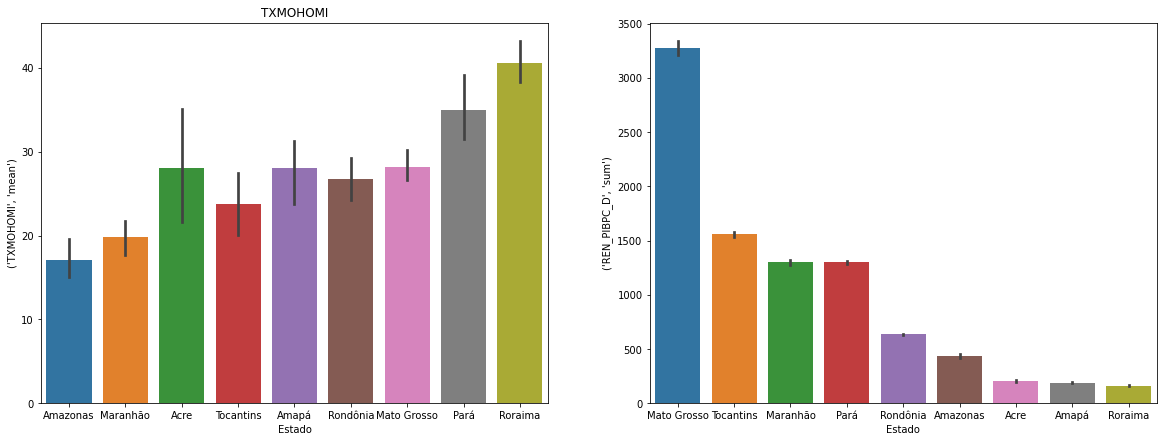

In [ ]:
i = 1
for col in ['TXMOHOMI']:
  plt.figure(i, figsize = (20,7))
  plt.subplot(1,2,1)
  sns.barplot(x ='Estado', y = (col,'mean'), data = df_groups.sort_values((col,'mean'), ascending = True))
  plt.title(col)
  plt.subplot(1,2,2)
  sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))

  i = i+1

Nao necessariamente um nivel maior de homício gera uma diminuição do PIB. Um exemplo é o maior PIB da região (Mato Grosso), o qual se encontra na 3ª posição do no ranking de homicídios.

### H13: Quanto maior a renda media do brasileiro acima de 18 anos, maior sera o PIB per capita.


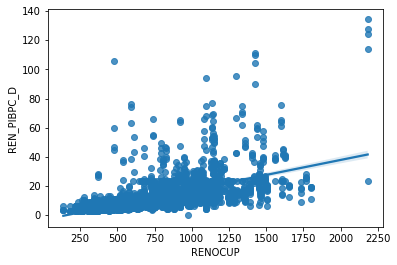

In [ ]:
sns.regplot(x = 'RENOCUP', y = 'REN_PIBPC_D', data = df_amazonia)

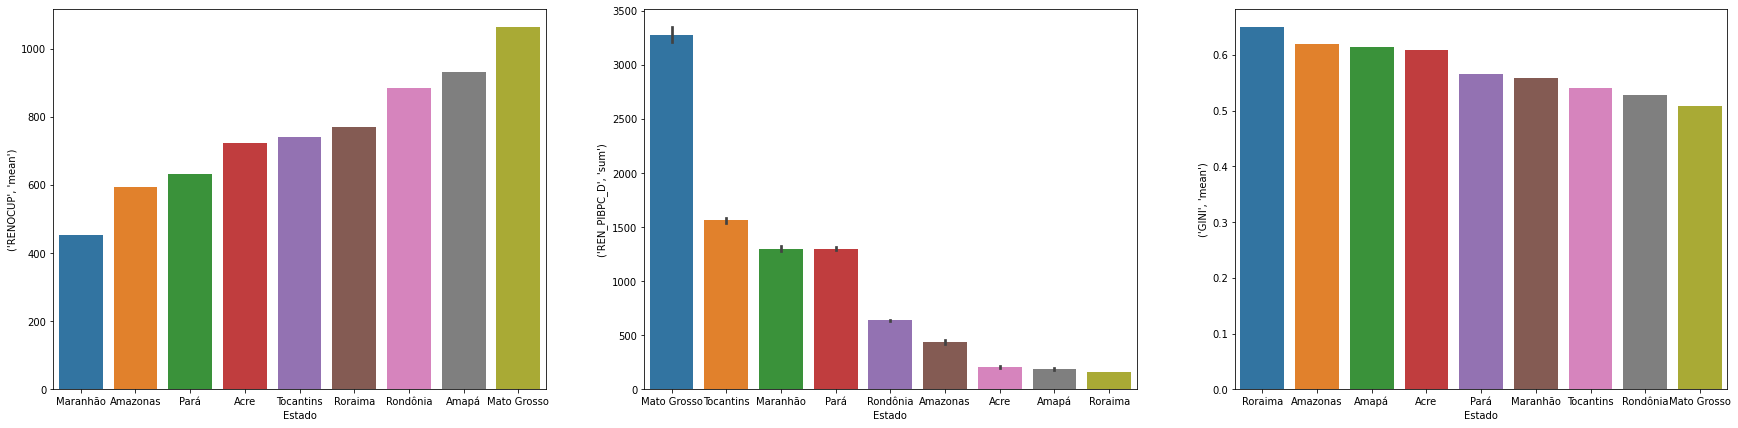

In [ ]:
plt.figure(1, figsize = (30,7))
plt.subplot(1,3,1)
sns.barplot(x ='Estado', y = ('RENOCUP','mean'), data = df_groups.sort_values(('RENOCUP','mean'), ascending = True))
plt.subplot(1,3,2)
sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))
plt.subplot(1,3,3)
sns.barplot(x ='Estado', y = ('GINI','mean'), data = df_groups.sort_values(('GINI','mean'), ascending = False))

A renda media das pessoas acima de 18 anos esta muito conectada com o coeficiente de desigualdade. Por exemplo, Amapa apresenta uma das maiores rendas medias, porem tambem apresenta um dos piores PIB per capita. Isso mostra o quanto desigual eh o estado, visto que o coeficiente GINI do Amapa eh um dos maiores.

### H14: Quanto maior a expectativa de vida do brasileiro, maior sera o PIB per capita.

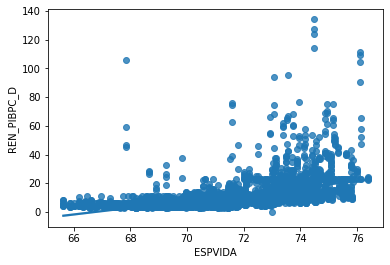

In [ ]:
sns.regplot(x = 'ESPVIDA', y = 'REN_PIBPC_D', data = df_amazonia)

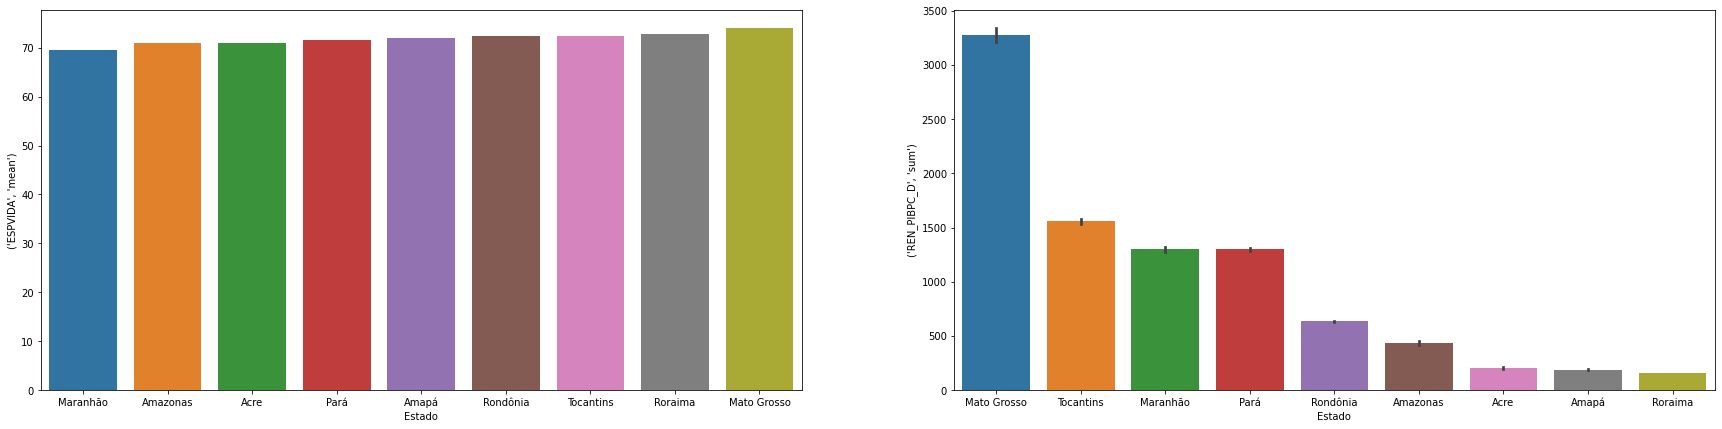

In [ ]:
plt.figure(1, figsize = (30,7))
plt.subplot(1,2,1)
sns.barplot(x ='Estado', y = ('ESPVIDA','mean'), data = df_groups.sort_values(('ESPVIDA','mean'), ascending = True))
plt.subplot(1,2,2)
sns.barplot(x ='Estado', y = ('REN_PIBPC_D','sum'), data = df_groups.sort_values(('REN_PIBPC_D','sum'), ascending = False))


A expectativa de vida do povo da amazonia legal eh, em media, em torno de 70 anos. O Mato Grosso lidera, seguido de Roraima (a qual apresenta o pior PIB per capita) e Tocantins.

In [ ]:
df_censo_groups = df_censo.groupby(['ANO','Estado'])['ESPVIDA'].mean().reset_index()

In [ ]:
df_pct_censo_year = df_censo_groups.set_index(['ANO', 'Estado']).ESPVIDA.unstack().pct_change()*100
df_pct_censo_year = df_pct_censo_year.dropna().T.reset_index()
#df_pct_year['ANO'] = ['2013-2014', '2014-2015', '2015-2016']
df_pct_censo_year.columns = ['Estado','1991-2000', '2000-2010']
df_pct_censo_year['var_anual'] = (df_pct_censo_year['1991-2000'] + df_pct_censo_year['2000-2010'])/(2010 - 1991)

In [ ]:
df_pct_espvida_amazonia = df_pct_censo_year[df_pct_censo_year['Estado'].isin(estados_amazonia_legal)].sort_values('var_anual')

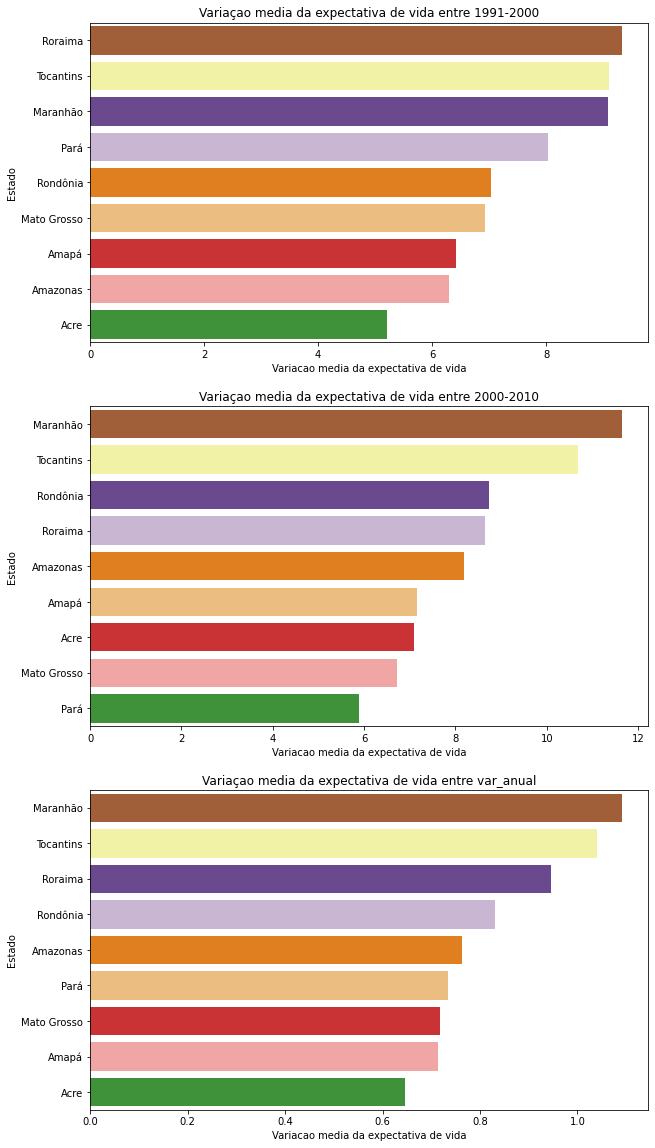

In [ ]:
i = 0
pal = sns.color_palette("Paired")

plt.figure(1, figsize = (10,20))
for col in df_pct_espvida_amazonia.columns[1:]:
  plt.subplot(3,1,i+1)
  sns.barplot(y = 'Estado', x = col, palette=np.array(pal[::-1]), data = df_pct_espvida_amazonia.sort_values(col, ascending = False), orient = 'h')
  plt.title('Variaçao media da expectativa de vida entre {}'.format(col))
  plt.xlabel('Variacao media da expectativa de vida')
  i = i+1

## Regresaso Linear - Modelo Log-linear

Nessa parte, buscamos encontrar coeficientes que representam as variações do PIB per capita em função de variações ou valores absolutos das variáveis independentes. Dessa forma, um modelo que se ajusta à esse tipo de problema é o modelo log-linear, em que é possível entender as relações de variações de acordo com variações percentuais ou absolutas.

Dessa forma, dado que utilizamos dados de painel, a equação é:

ln(REN_PIBPC_D) = Betha0 + Betha1*POP_TOT + Betha2*VA_adm + Betha3*VA_ind + 1.Betha4*VA_serv + Betha5*VA_agro + Betha6*Impostos + Betha7*RENOCUP + Betha8*P_FORMAL + Betha9*IDHM + Betha10*ESPVIDA + Betha11*T_FUNDIN_TODOS_MMEIO + Betha12*T_ANALF18M + Betha13*MORT1 + Betha14*T_SUPER25M + Betha15*DIST_EF_TOTAL + Betha16*AGUA_ESGOTO + Betha17*T_FUND18M + -0.Betha18*T_MED25M + Betha19*T_LIXO + Betha20*T_AGUA + Betha21*GINI + Betha22*T_LUZ + Betha23*TXMOAGR + Betha24*TXMOHOMI + mu_e

em que Betha0 é a interceptação da curva e mu_e é o erro do modelo.

In [ ]:
# Variaveis a serem utilizadas pelo modelo
X = df_amazonia[['POP_TOT','VA_adm', 'VA_ind', 'VA_serv', 'VA_agro', 'Impostos',
             'RENOCUP', 'P_FORMAL', 'IDHM', 'ESPVIDA', 'T_FUNDIN_TODOS_MMEIO',
             'T_ANALF18M', 'MORT1', 'T_SUPER25M', 'DIST_EF_TOTAL', 'AGUA_ESGOTO',
             'T_FUND18M', 'T_MED25M', 'T_LIXO', 'T_AGUA', 'GINI', 'T_LUZ', 'TXMOAGR',
             'TXMOHOMI']]

In [ ]:
# Gerando o ln do PIB
y = np.log1p(df_amazonia[['REN_PIBPC_D']])

In [ ]:
# Adiciona a constante ao dataset 
pooled_X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Modelo Pooled
pooled_olsr_model = sm.OLS(endog=y, exog=pooled_X)

In [ ]:
# Ajusta o modelo aos dados
pooled_olsr_model_results = pooled_olsr_model.fit()

In [ ]:
# Apresenta o resumo estatístico
print(pooled_olsr_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:            REN_PIBPC_D   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     400.9
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        20:26:34   Log-Likelihood:                -996.18
No. Observations:                4035   AIC:                             2042.
Df Residuals:                    4010   BIC:                             2200.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6182 

Coeficientes estatisticamente confiáveis:
- POP_TOT
- VA_adm, VA_ind, VA_serv, VA_agro
- RENOCUP
- P_FORMAL
- ESPVIDA
- T_ANALF18M
- DIST_EF_TOTAL
- AGUA_ESGOTO
- T_LIXO
- T_AGUA
- GINI, 
- TXMOAGR
- TXMOHOMI

In [ ]:
# Media dos residuos
print('Mean value of residual errors='+str(pooled_olsr_model_results.resid.mean()))

Mean value of residual errors=6.385584612365727e-14


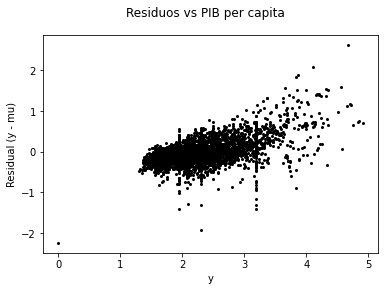

In [ ]:
# Correlacao do Residuo com a variavel alvo
fig, ax = plt.subplots()
fig.suptitle('Residuos vs PIB per capita')
plt.ylabel('Residual (y - mu)')
plt.xlabel('y')
ax.scatter(y, pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()

O modelo ajustado mostra que as variáveis conseguem explicar cerca de 70% da variação PIB do país, o que não é muito bom para dados reais. Além disso, há uma certa significância estatística para os coeficientes (p < 0.05). A correlação do erro e da variavel resposta apresenta um nível elevado, o que pode signficar que há mais variáveis que estão sendo deixadas de lado na modelagem.

Conclui-se que podemos estimar alguns coeficientes e mostrar quais indicadores são mais relevantes para o cálculo da regressão. 

In [ ]:
# Lista de coeficientes
coeffs = pooled_olsr_model_results.params.tolist()

In [ ]:
# Equacao
eq = "ln PIB_pc = {} + ".format(coeffs[0])
for coeff, var in zip(coeffs[1:], X.columns):
  eq = eq + '{}'.format(coeff) + '*' + var + ' + '


As variações do PIB per capita são dadas diretamente pelo coeficiente quandoo a variável representa também uma variação (Porcentagem, etc). Entretanto, quando desejado saber a variação percentual do PIB per capita e a variável apresenta valores absolutos, é necessário tornar linear o coeficiente. Dessa forma, aplica-se o calculo do valor exponencial:

(exp(Betha/100) - 1) * 100

In [ ]:
dict_coefs = dict()
for col, coef in zip(X.columns,coeffs[1:]):
  dict_coefs[col] = coef

In [ ]:
def estima_PIB(var, un, value, dict_coef, unit ='perc'):
  '''
  Funçao que estima a variacao do PIB baseado na variacao de uma variavel
  '''
  
  if unit == 'perc':
    print('Baseado na variacao de {}% de {}, o PIB per capita municipal varia {:.3f}%'. format(value, var, dict_coef[var] * value/un))
    return dict_coef[var] * value/un
  else:
    print('Baseado em um acréscimo de {} de {}, o PIB per capita municipal varia {:.3f}%'. format(value, var, value/un * (np.exp(dict_coef[var]) - 1) *100))
    return value/un * (np.exp(dict_coef[var]) - 1) *100

#### Relações de Crescimento e Decrescimento do PIB

In [ ]:
estima_PIB('POP_TOT', 1, 10e3, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 10000.0 de POP_TOT, o PIB per capita municipal varia -2.000%


-1.9997351603517899

In [ ]:
estima_PIB('VA_agro', 1e3, 10e6, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 10000000.0 de VA_agro, o PIB per capita municipal varia 0.897%


0.8969510618683785

In [ ]:
estima_PIB('VA_adm', 1e3, 10e6, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 10000000.0 de VA_adm, o PIB per capita municipal varia -0.124%


-0.12415719197189645

In [ ]:
estima_PIB('VA_ind', 1e3, 10e6, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 10000000.0 de VA_ind, o PIB per capita municipal varia 0.096%


0.09633798847552555

In [ ]:
estima_PIB('VA_serv', 1e3, 10e6, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 10000000.0 de VA_serv, o PIB per capita municipal varia 0.139%


0.1390858319627597

In [ ]:
estima_PIB('RENOCUP', 1, 100, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 100 de RENOCUP, o PIB per capita municipal varia 6.941%


6.940837989644066

In [ ]:
estima_PIB('P_FORMAL', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de P_FORMAL, o PIB per capita municipal varia 0.004%


0.004460574453972554

In [ ]:
estima_PIB('ESPVIDA', 1, 1, dict_coefs, unit = 'abs')

Baseado em um acréscimo de 1 de ESPVIDA, o PIB per capita municipal varia 2.374%


2.3743877381575684

In [ ]:
estima_PIB('T_ANALF18M', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de T_ANALF18M, o PIB per capita municipal varia -0.007%


-0.006581686978385367

In [ ]:
estima_PIB('DIST_EF_TOTAL', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de DIST_EF_TOTAL, o PIB per capita municipal varia -0.004%


-0.004398722277076371

In [ ]:
estima_PIB('AGUA_ESGOTO', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de AGUA_ESGOTO, o PIB per capita municipal varia -0.003%


-0.002935224597953156

In [ ]:
estima_PIB('T_AGUA', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de T_AGUA, o PIB per capita municipal varia -0.001%


-0.001088548402886391

In [ ]:
estima_PIB('T_LIXO', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de T_LIXO, o PIB per capita municipal varia 0.001%


0.0011135936540893716

In [ ]:
estima_PIB('GINI', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de GINI, o PIB per capita municipal varia -0.817%


-0.8174098514404501

In [ ]:
estima_PIB('TXMOAGR', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de TXMOAGR, o PIB per capita municipal varia 0.003%


0.002502064327482401

In [ ]:
estima_PIB('TXMOHOMI', 1, 1, dict_coefs, unit = 'perc')

Baseado na variacao de 1% de TXMOHOMI, o PIB per capita municipal varia -0.001%


-0.0013905848837035928

Conclusão: 

Com base nos dados analisados anteriormente, conclui-se que: 

1. Com a reduçao de cerca de 1% da desigualdade socio-economica, é possivel aumentar em quase 1% o PIB per capita municipal;

2. Gerar condiçoes de saude melhores, de forma que seja possivel aumentar a expectativa em pelo menos 1 ano de vida, garante tambem um aumento de cerca de 2% do PIB per capita municipal.

3. Aumentar a Renda do brasileiro eh o fator que mais impacta no setor economico. Dessa forma, constata-se que um aumento de pelo menos 100 reais mensais na media de rendimento pode aumentar em torno de 7% o PIB per capita municipal, seja atraves de novos empregos ou qualificando a mao de obra ja existe.

4. A participaçao dos setores mostra que o setor Agropecuario eh o que mais gera dinheiro na Amazonia Legal. Atraves do aumento de 10 milhoes do valor adicionado para esse setor, é possivel aumentar cerca de 1% o PIB per capita municipal. Quando comparado o mesmo valor adicionado, porem na industria, o PIB per capita varia 9 vezes menos.

Fazendo uma projeçao para 2030 baseado na media do crescimento anual por estado:

Analisando cada item individualmente, foi possivel perceber que apenas 3 estados possuem uma media de reducao da desigualdade. Esses estados sao Rondonia, Mato Grosso e Roraima. Projetando o aumento % do PIB em 13 anos, é possivel alcançar ate 1.05x para o melhor caso (Rondonia) e uma reducao de 0.9x para o pior caso (Acre). 

A expectativa de vida de todos os estados da Amazonia Legal vem crescendo ano apos ano, com uma media de crescimento de ate 1 ano de vida por estado. Quanto maior o tempo de vida das pessoas, mais elas contribuem para o PIB. Assim, fazendo uma projecao para 2030, considerando o pior e o melhor caso, alcançaria cerca de 1.39x para o melhor caso (Maranhao) e 1.17x para o pior caso (Acre).

O impacto do setor agro pecuarista eh o que apresenta maior potencial de aumento no PIB pois apenas 10 milhoes a mais gera 0.9% no PIB per capita. Fazendo uma projecao para o pior e melhor caso, alcança-se um aumento no PIB per capita de 4861x no Mato Grosso e apenas 1.17x no Amapá. 

Por fim, repetindo a mesma analise para o setor industrial, projeta-se para 2030 no melhor caso (Para) um aumento de 7.7x do PIB per capita, enquanto para o pior caso (Roraima) ha um encolhimento do PIB de 0.96x.



-

OBS: Nao ha dados suficientes para fazer projecoes para o aumento do PIB per capita em relacao a renda media.


Considerações finais sobre a evolução do PIB:
- Assim, fica evidente que o setor agropecuarista, com o principal representante o Mato Grosso, é o setor que mais tem potencial de gerar crescimento entre os estados da Amazônia Legal. Entretanto, deve-se considerar alternativas mais sustentáveis e investimento em tecnologia para uma menor agressão ao solo e menos desmatamento. 

- Estados que possuem uma taxa de desigualdade crescendo devem ser levados em consideração (Acre, Maranhão, Amapá , Amazonas, Pará e Tocantins), pois através de melhorias nessa área pode-se ter um aumento substancial no PIB. 

- Quando considerado a a esperança de vida, os estados que menos aumentam esse indicador são Acre e Amapá, e conseuqentemente possuem um menor crescimento do PIB per capita.

- Por fim, como a indústria e o setor agropecuarista impactam muito no valor adicional do PIB, é necessário que haja um desenvolvimento mais engajado para estados com projeção estagnada ou de encolhimento. Dessa forma, desenvolvendo Amapá, Acre e Roraima em ambos setores, consegue-se alavancar esses estados.





### Graficos Uteis para Apresentacao:

#### GINI x PIB

In [ ]:
def label_graph(ax, fmt):
    for p in ax.patches:
        h = p.get_height()
        
        if h > 0:
          ax.annotate(format(h, fmt), 
                        (p.get_x() + p.get_width() / 2., h), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
        else:
          ax.annotate(format(h, fmt), 
                        (p.get_x() + p.get_width() / 2., h - 0.06), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

In [ ]:
def calcula_pib_abs(atual, variacao, tempo):
  return atual * (1 + variacao)**tempo

In [ ]:
def projecao_2030(df_ind, ind, un, unit, dict_coefs, df_amazonia):
 
  df_ind['var_PIB'] = df_ind['var_anual'].apply(lambda x: estima_PIB(ind,un,x, dict_coefs, unit = unit)/100)
  # Filtra os dados em 2017
  df_amazonia_pib = df_amazonia[df_amazonia['ANO'] == '2017'].groupby('Estado')['PIB'].sum().reset_index()
  # Adiciona a projecao
  df_amazonia_pib = pd.merge(df_amazonia_pib, df_ind[['Estado','var_PIB']])
  # Poe ano e escala em milhoes
  df_amazonia_pib['Ano'] = 2017
  df_amazonia_pib['PIB'] = df_amazonia_pib['PIB']
  
  # Cria um novo dataset para 2030
  df_amazonia_pib_2030 = df_amazonia_pib.copy()

  # Projeta para 2030
  df_amazonia_pib_2030['PIB'] = calcula_pib_abs(df_amazonia_pib['PIB'], df_amazonia_pib['var_PIB'], 13)
  df_amazonia_pib_2030 = df_amazonia_pib_2030.sort_values('var_PIB', ascending = False)
  # Adiciona a data 2030
  df_amazonia_pib_2030['Ano'] = 2030

  # Junta 2017 e 2030 no mesmo dataframe
  df_proj = pd.concat([df_amazonia_pib, df_amazonia_pib_2030], axis = 0)

  return df_proj



In [ ]:
# Inclui o a variacao de gini
df_pct_gini_amazonia['Crescimento'] = df_pct_gini_amazonia['var_anual'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')
# Inclui as cores
df_pct_gini_amazonia['color'] = df_pct_gini_amazonia['var_anual'].apply(lambda x: 'r' if x > 0 else 'g')

In [ ]:
# Coloca as cores em uma palette
palette = dict()
for cresc, color in zip(df_pct_gini_amazonia['Crescimento'], df_pct_gini_amazonia['color']):
  palette[cresc] = color

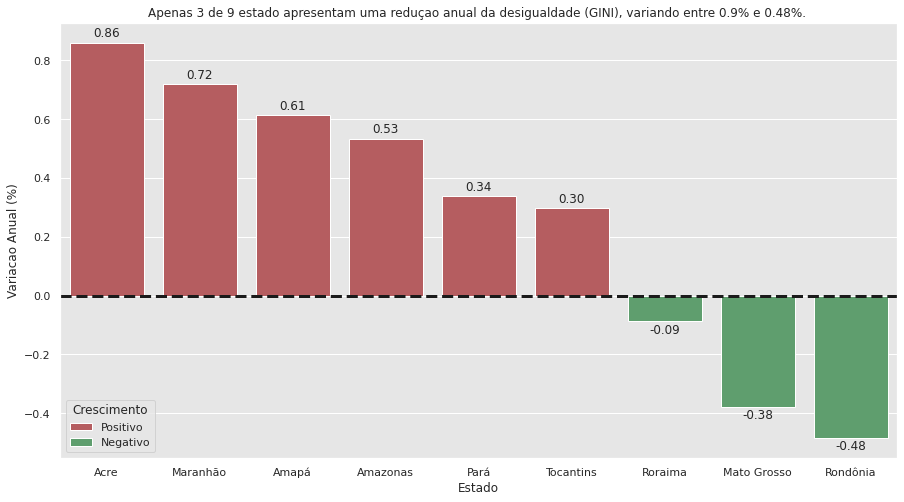

In [ ]:
# GINI Plot
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
plt.figure(1, figsize = (15,8))
ax = sns.barplot(x = 'Estado', y ='var_anual', hue = 'Crescimento', palette = palette, dodge = False, data = df_pct_gini_amazonia[['Estado', 'var_anual','Crescimento']].sort_values('var_anual', ascending = False))
ax.axhline(0, linewidth = 3, linestyle = '--', color = 'k')
ax.set_ylabel('Variacao Anual (%)')
ax.set_title('Apenas 3 de 9 estado apresentam uma reduçao anual da desigualdade (GINI), variando entre 0.9% e 0.48%. ')
label_graph(ax, '.2f')

In [ ]:
# Dataframe de projecao
df_proj = projecao_2030(df_pct_gini_amazonia, 'GINI', 1, 'perc', dict_coefs, df_amazonia)

Baseado na variacao de -0.48417471016419916% de GINI, o PIB per capita municipal varia 0.396%
Baseado na variacao de -0.3770259568364666% de GINI, o PIB per capita municipal varia 0.308%
Baseado na variacao de -0.08780754703660547% de GINI, o PIB per capita municipal varia 0.072%
Baseado na variacao de 0.29916564517441163% de GINI, o PIB per capita municipal varia -0.245%
Baseado na variacao de 0.339409267188338% de GINI, o PIB per capita municipal varia -0.277%
Baseado na variacao de 0.53437543037048% de GINI, o PIB per capita municipal varia -0.437%
Baseado na variacao de 0.6130321621119157% de GINI, o PIB per capita municipal varia -0.501%
Baseado na variacao de 0.7208464809596646% de GINI, o PIB per capita municipal varia -0.589%
Baseado na variacao de 0.860519581971139% de GINI, o PIB per capita municipal varia -0.703%


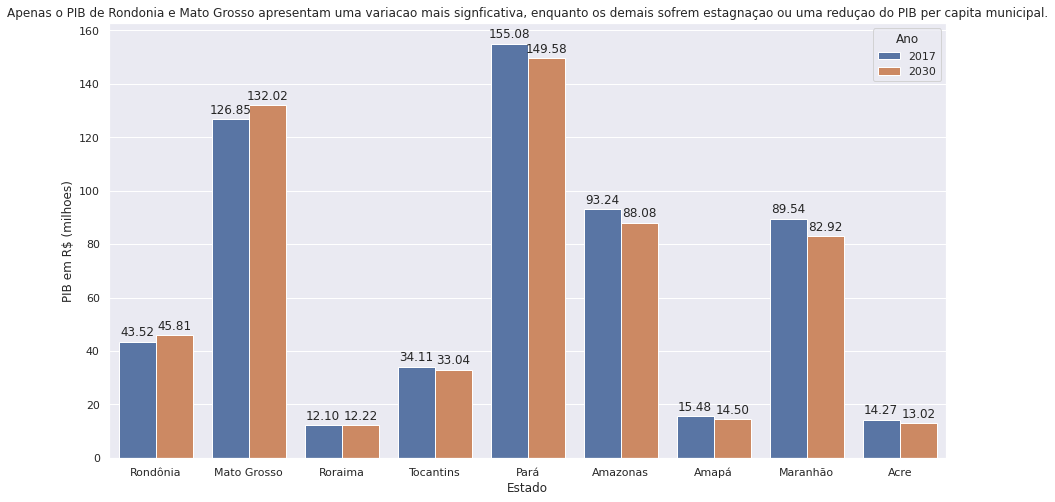

In [ ]:
# Plot PIB
df_aux = df_proj.copy()
df_aux['PIB'] = df_proj['PIB'] / 1e6
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.dark_palette("purple")
sns.set()
plt.figure(1, figsize = (15,8))

ax = sns.barplot(x = 'Estado', y = 'PIB', hue = 'Ano', data = df_aux.sort_values('var_PIB', ascending = False))
ax.set_ylabel('PIB em R$ (milhoes)')
ax.set_title('Apenas o PIB de Rondonia e Mato Grosso apresentam uma variacao mais signficativa, enquanto os demais sofrem estagnaçao ou uma reduçao do PIB per capita municipal.')
label_graph(ax, '.2f')


#### ESPVIDA x PIB

In [ ]:
# Inclui o a variacao de esperança de vida
df_pct_espvida_amazonia['Crescimento'] = df_pct_espvida_amazonia['var_anual'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')
# Inclui as cores
df_pct_espvida_amazonia['color'] = df_pct_espvida_amazonia['var_anual'].apply(lambda x: 'g' if x > 0 else 'r')

In [ ]:
# Coloca as cores em uma palette
palette = dict()
for cresc, color in zip(df_pct_espvida_amazonia['Crescimento'], df_pct_espvida_amazonia['color']):
  palette[cresc] = color

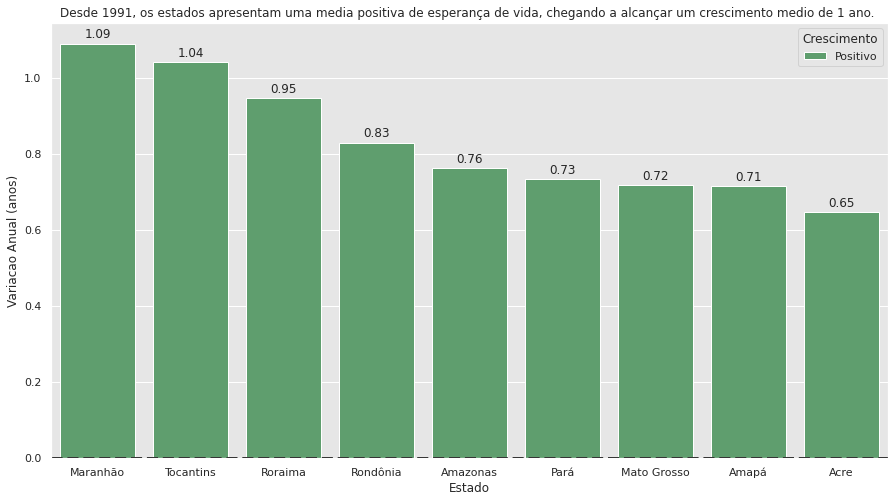

In [ ]:
# ESPVIDA Plot
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
plt.figure(1, figsize = (15,8))
ax = sns.barplot(x = 'Estado', y ='var_anual', hue = 'Crescimento', palette = palette, dodge = False, data = df_pct_espvida_amazonia[['Estado', 'var_anual','Crescimento']].sort_values('var_anual', ascending = False))
ax.axhline(0, linewidth = 3, linestyle = '--', color = 'k')
ax.set_ylabel('Variacao Anual (anos)')
ax.set_title('Desde 1991, os estados apresentam uma media positiva de esperança de vida, chegando a alcançar um crescimento medio de 1 ano. ')
label_graph(ax, '.2f')

In [ ]:
# Dataframe de projecao
df_proj = projecao_2030(df_pct_espvida_amazonia, 'ESPVIDA', 1, 'abs', dict_coefs, df_amazonia)

Baseado em um acréscimo de 0.6470710226525251 de ESPVIDA, o PIB per capita municipal varia 1.536%
Baseado em um acréscimo de 0.7146224528943546 de ESPVIDA, o PIB per capita municipal varia 1.697%
Baseado em um acréscimo de 0.718289265128324 de ESPVIDA, o PIB per capita municipal varia 1.705%
Baseado em um acréscimo de 0.7334089823117679 de ESPVIDA, o PIB per capita municipal varia 1.741%
Baseado em um acréscimo de 0.7621766531252384 de ESPVIDA, o PIB per capita municipal varia 1.810%
Baseado em um acréscimo de 0.8300706118482035 de ESPVIDA, o PIB per capita municipal varia 1.971%
Baseado em um acréscimo de 0.9464037027936246 de ESPVIDA, o PIB per capita municipal varia 2.247%
Baseado em um acréscimo de 1.040827447396589 de ESPVIDA, o PIB per capita municipal varia 2.471%
Baseado em um acréscimo de 1.0903657213609375 de ESPVIDA, o PIB per capita municipal varia 2.589%


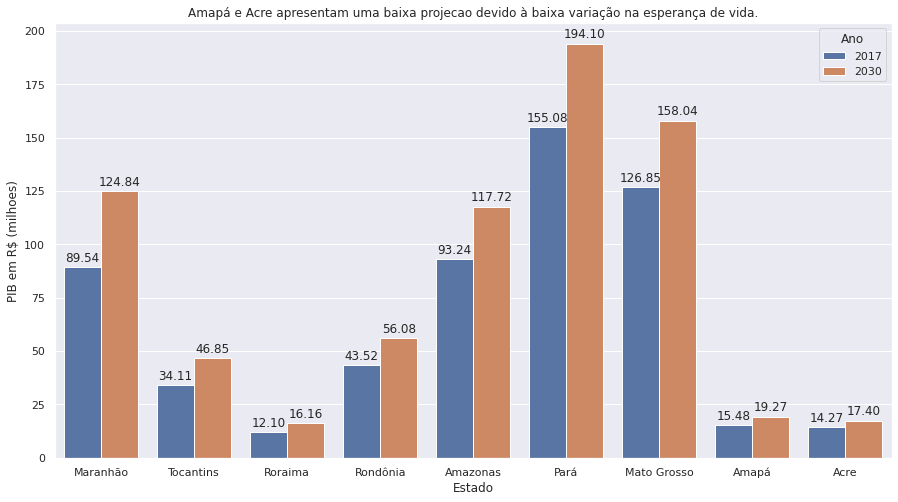

In [ ]:
# Plot PIB
df_aux = df_proj.copy()
df_aux['PIB'] = df_proj['PIB'] / 1e6
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.dark_palette("purple")
sns.set()
plt.figure(1, figsize = (15,8))

ax = sns.barplot(x = 'Estado', y = 'PIB', hue = 'Ano', data = df_aux.sort_values('var_PIB', ascending = False))
ax.set_ylabel('PIB em R$ (milhoes)')
ax.set_title('Amapá e Acre apresentam uma baixa projecao devido à baixa variação na esperança de vida.')
label_graph(ax, '.2f')


#### Agro x PIB

In [ ]:
# Inclui o a variacao de gini
df_diff_va_agro_year['Crescimento'] = df_diff_va_agro_year['var_anual'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')
# Inclui as cores
df_diff_va_agro_year['color'] = df_diff_va_agro_year['var_anual'].apply(lambda x: 'g' if x > 0 else 'r')

In [ ]:
# Coloca as cores em uma palette
palette = dict()
for cresc, color in zip(df_diff_va_agro_year['Crescimento'], df_diff_va_agro_year['color']):
  palette[cresc] = color

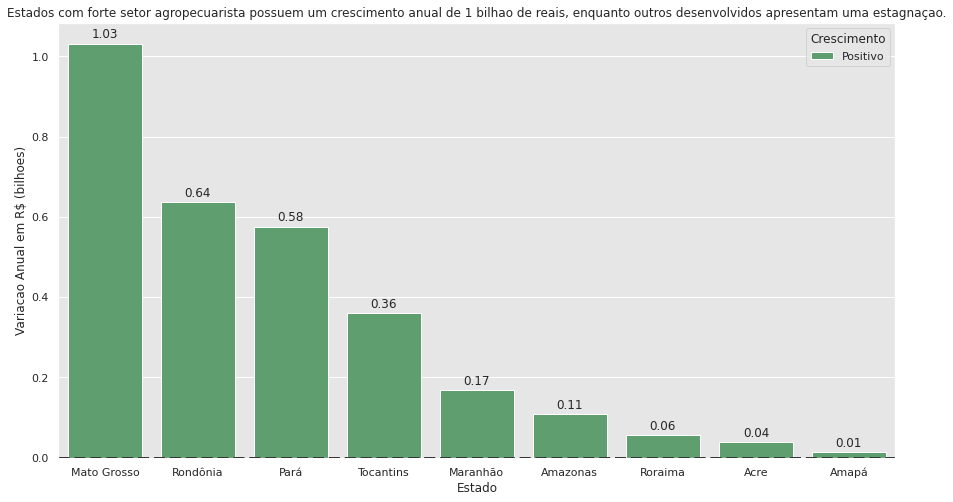

In [ ]:
# VA_agro Plot
df_aux = df_diff_va_agro_year.copy()
df_aux['var_anual'] = df_aux['var_anual']/1e9 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
plt.figure(1, figsize = (15,8))
ax = sns.barplot(x = 'Estado', y ='var_anual', hue = 'Crescimento', palette = palette, dodge = False, data = df_aux[['Estado', 'var_anual','Crescimento']].sort_values('var_anual', ascending = False))
ax.axhline(0, linewidth = 3, linestyle = '--', color = 'k')
ax.set_ylabel('Variacao Anual em R$ (bilhoes)')
ax.set_title('Estados com forte setor agropecuarista possuem um crescimento anual de 1 bilhao de reais, enquanto outros desenvolvidos apresentam uma estagnaçao.')
label_graph(ax, '.2f')

In [ ]:
# Dataframe de projecao
df_proj = projecao_2030(df_diff_va_agro_year, 'VA_agro', 1e3, 'abs', dict_coefs, df_amazonia)

Baseado em um acréscimo de 40029067.250000015 de VA_agro, o PIB per capita municipal varia 3.590%
Baseado em um acréscimo de 14242790.000000007 de VA_agro, o PIB per capita municipal varia 1.278%
Baseado em um acréscimo de 109550085.25 de VA_agro, o PIB per capita municipal varia 9.826%
Baseado em um acréscimo de 168451896.74999982 de VA_agro, o PIB per capita municipal varia 15.109%
Baseado em um acréscimo de 1031403775.0000005 de VA_agro, o PIB per capita municipal varia 92.512%
Baseado em um acréscimo de 575894261.5000001 de VA_agro, o PIB per capita municipal varia 51.655%
Baseado em um acréscimo de 636780913.2499999 de VA_agro, o PIB per capita municipal varia 57.116%
Baseado em um acréscimo de 56256535.5 de VA_agro, o PIB per capita municipal varia 5.046%
Baseado em um acréscimo de 361212061.75 de VA_agro, o PIB per capita municipal varia 32.399%


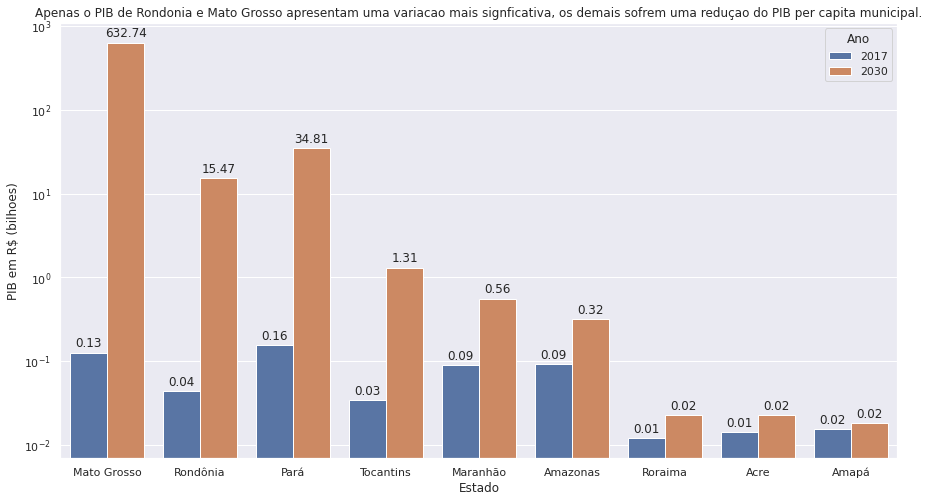

In [ ]:
# Plot PIB
df_aux = df_proj.copy()
df_aux['PIB'] = df_proj['PIB'] / 1e9
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.dark_palette("purple")
sns.set()
plt.figure(1, figsize = (15,8))

ax = sns.barplot(x = 'Estado', y = 'PIB', hue = 'Ano', data = df_aux.sort_values('var_PIB', ascending = False))
ax.set_yscale("log")
ax.set_ylabel('PIB em R$ (bilhoes)')
ax.set_title('Apenas o PIB de Rondonia e Mato Grosso apresentam uma variacao mais signficativa, os demais sofrem uma reduçao do PIB per capita municipal.')
label_graph(ax, '.2f')


#### Ind x PIB

In [ ]:
# Inclui o a variacao de gini
df_diff_va_ind_year['Crescimento'] = df_diff_va_ind_year['var_anual'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')
# Inclui as cores
df_diff_va_ind_year['color'] = df_diff_va_ind_year['var_anual'].apply(lambda x: 'g' if x > 0 else 'r')

In [ ]:
# Coloca as cores em uma palette
palette = dict()
for cresc, color in zip(df_diff_va_ind_year['Crescimento'], df_diff_va_ind_year['color']):
  palette[cresc] = color

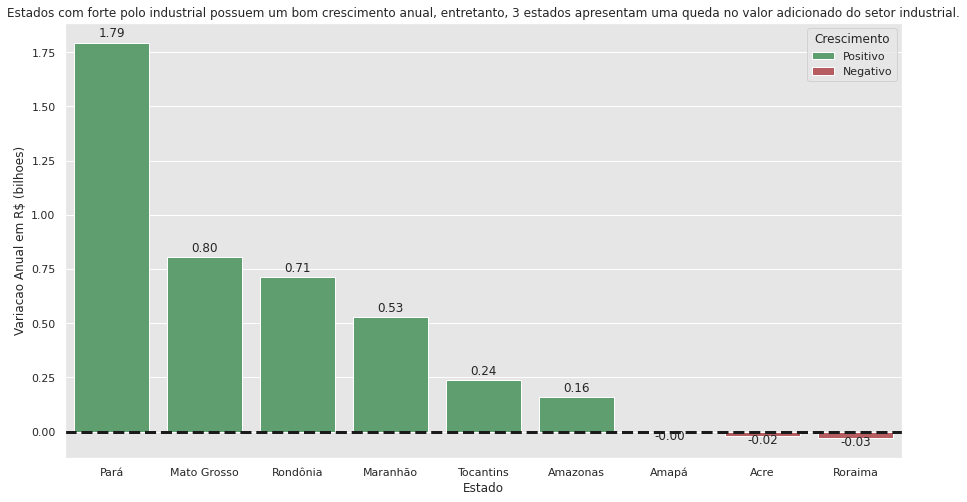

In [ ]:
# VA_ind Plot
df_aux = df_diff_va_ind_year.copy()
df_aux['var_anual'] =df_aux['var_anual']/1e9 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
plt.figure(1, figsize = (15,8))
ax = sns.barplot(x = 'Estado', y ='var_anual', hue = 'Crescimento', palette = palette, dodge = False, data = df_aux[['Estado', 'var_anual','Crescimento']].sort_values('var_anual', ascending = False))
ax.axhline(0, linewidth = 3, linestyle = '--', color = 'k')
ax.set_ylabel('Variacao Anual em R$ (bilhoes)')
ax.set_title('Estados com forte polo industrial possuem um bom crescimento anual, entretanto, 3 estados apresentam uma queda no valor adicionado do setor industrial.')
label_graph(ax, '.2f')

In [ ]:
# Dataframe de projecao
df_proj = projecao_2030(df_diff_va_ind_year, 'VA_ind', 1e3, 'abs', dict_coefs, df_amazonia)

Baseado em um acréscimo de -20992074.00000003 de VA_ind, o PIB per capita municipal varia -0.202%
Baseado em um acréscimo de -1014905.9999999553 de VA_ind, o PIB per capita municipal varia -0.010%
Baseado em um acréscimo de 159095507.49999934 de VA_ind, o PIB per capita municipal varia 1.533%
Baseado em um acréscimo de 526517640.0000002 de VA_ind, o PIB per capita municipal varia 5.072%
Baseado em um acréscimo de 804732205.4999998 de VA_ind, o PIB per capita municipal varia 7.753%
Baseado em um acréscimo de 1794063529.2499995 de VA_ind, o PIB per capita municipal varia 17.284%
Baseado em um acréscimo de 713283401.0 de VA_ind, o PIB per capita municipal varia 6.872%
Baseado em um acréscimo de -29544400.499999993 de VA_ind, o PIB per capita municipal varia -0.285%
Baseado em um acréscimo de 237237769.25000003 de VA_ind, o PIB per capita municipal varia 2.286%


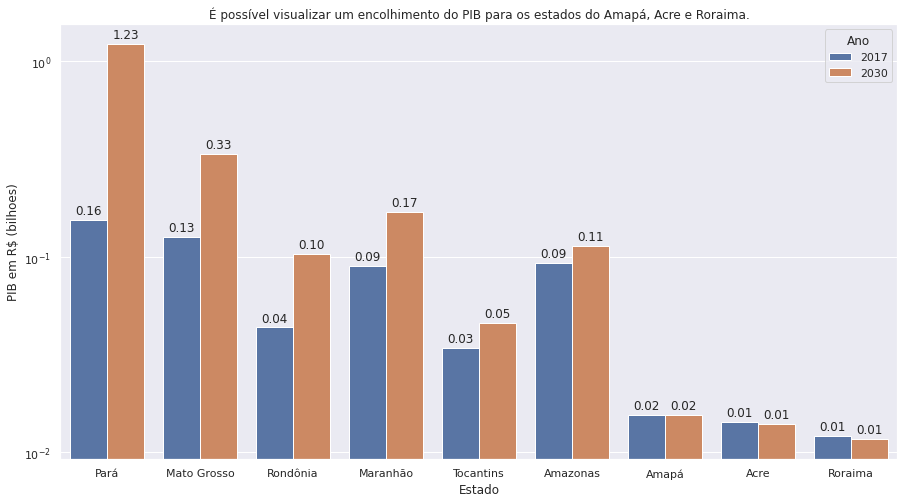

In [ ]:
# Plot PIB
df_aux = df_proj.copy()
df_aux['PIB'] = df_proj['PIB'] / 1e9
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.dark_palette("purple")
sns.set()
plt.figure(1, figsize = (15,8))

ax = sns.barplot(x = 'Estado', y = 'PIB', hue = 'Ano', data = df_aux.sort_values('var_PIB', ascending = False))
ax.set_yscale("log")
ax.set_ylabel('PIB em R$ (bilhoes)')
ax.set_title('É possível visualizar um encolhimento do PIB para os estados do Amapá, Acre e Roraima.')
label_graph(ax, '.2f')
